# Donald Trump - Insights in 140 characters

---

## Initial research outline

As presidents lead their nation, we believe their actions could set an example and influence and encourage certain behaviors. We will investigate if there is a possible correlation between sentiment conveyed by such figures via social media and negative social behavior of a nation.

The presidency of Donald Trump has been marked with many controversies, including the rise of supremacist groups and numerous nation wide conflicts. By using Trump tweets, we would explore if there is a significant temporal correlation between sentiment expressed in the Tweet and the number of conflicts in the nation using GDELT dataset. To reduce the bias of such analysis, we would perform the same analysis with social media activity of his predecessor and compare the results, as well as adding the social-economic aspects which may affect such behaviors.

What is the power of a presidential tweet? We hope that we will have more insight on the answer of this question and raise awareness on the impact 140 characters can make.

### Research questions
* Do violent events or crimes occur more frequently after presidential tweets?
* Is the correlation higher with negative sentiment of the tweet?
* Does a significant difference exists between such correlation with Trump and Obama presidency?
* Is there a difference in sentiment expressed in tweets before and after Trump becoming a presidential candidate?
* How do social-economical aspects influence the correlation?
* Does the political regiment affect such negative behavior on a larger scale?

### Dataset

#### Trump tweets
* Downloading the complete dataset locally and processing the JSON files
* We would use mainly the timestamps and tweet content for our analysis:
  * timestamps for temporal correlation with events
  * tweet content for sentiment analysis
* We could follow the impact of tweet by analyzing:
  * number of retweets
  * number of favorites
  * number of followers
  
#### GDELT
* We would use GDELT Global Knowledge graph to gain insights on events:
  * geolocalized to USA
  * in specified timeframe, starting from 2013
  * specific events, such as protests or violent manifestations
  * will need knowledge on working on the cluster and accessing the data
  
#### Wikidata
* Obtaining data for social-economical indicators:
  * for a specific period of time
  * for a specific region of the USA
  * data wrangling and processing

#### Obama tweets *
Available at: http://obamawhitehouse.gov.archivesocial.com/

* It would enrich our analysis by providing an insight in differences between the two leaders
* We strive for a more complete and less biased analysis

---

## Evolution of research topic

The initial project proposal has evolved through iterations of data exploration, evaluation of project complexity and consultation with the teaching team in ADA.

### Main concerns that have been raised
* project required many areas of expertise
    * from social studies, behavioral studies, to mechanisms of USA economy
    * unable to reach the level of expertise on our own
    * for this type of project having external scientists would be an overkill
* timeframe for this project is limited
    * practically impossible to have a meaningful insight in about a month
* **signal detection and correlation would be very hard to prove since many underlying factors exist - complexity is high**
* GDELT could not provide the necessary granularity for this survey

A comment that described our situation and prospect of success:
> You will probably need a PhD to be able to come close to a meaningful result.

Even though we were passionate about our idea, we have realized we need to reduce the scope and pinpoint specific research questions that are feasible with our current expertise and available time. We are thankful to very insightful comments from professor Bob West who steered us to our current project. The project is reasonable, it is possibly insightful and we hope to squeeze as much information from the dataset as possible.

---

## Research questions that will be explored:

* ### Is there a difference in sentiment expressed in tweets before and after Trump becoming a presidential candidate?
    * #### How does the sentiment evolve in Tweets? What are the predominant emotions?
* ### What is the structure of popular Tweets? Whom does he mention or tag?
* ### Is there a significant trend in Trump reacting to certain topics in news?
    * #### What does he tweet about after certain topic in news is published?
    * #### Does he try to distract his followers by certain topics (e.g. after topics such as Russia)
    
## Datasets

### Trump tweets

A collection of Tweets from the Donald Trump account (RealDonaldTrump). It is an extensive compilation of all the tweets he (or his assistants and social media managers) have posted. We will use this dataset as the base for our research questions and exploration.

### Internet archive - Trump TV news factchecks

In order to tackle tendencies in Trump's tweets regarding different topics in news, we have utilized the Internet archive Trump TV news factchecks dataset. It is a dataset that features the news concerning Trump and his cabinet, along with date of airing, topics covered and news outlet.


## Outline

* Data analysis
    * Exploratory data analysis
    * Data insights
    * Exploring both Trump tweets and Trump news
* How does Trump react to the events in the news?
    * What is in the news when Trump tweets about certain topics?
    * What does Trump tweet about when certain topics are in the news?
* Are Trump's tweets getting more rude over time?


# Data analysis

---

## General overview

We will perform an exploratory data analysis to get a deeper insight on the available data and information within. The two datasets we have decided on using are:

* Trump Twitter archive: *main dataset*
* Internet archive - Trump TV news factchecks: *enrichment dataset*


### Trump Twitter archive

Trump Twitter archive represents the complete collection of Tweets from the account of Donald Trump, since the first Tweet in 2009. The dataset has been obtained from [Trump Twitter Archive github repository](https://github.com/bpb27/trump_tweet_data_archive).

Internally, the dataset has been obtained by combining [Twitter scraper](https://github.com/bpb27/twitter_scraping) and official Twitter API. This combination would allow for scraping Tweets from any user account without a need to use the official premium Twitter API.

The result set is compliant with Twitter API output and information on meaning of columns in our dataset can be obtained by looking into [official documentation](https://developer.twitter.com/en/docs/tweets/tweet-updates).

More information and explorative data analysis will follow.

### Internet archive - Trump TV news factchecks

In further research we would like to have an insight how Donald Trump reacts to the news about him. Obtaining a dataset which collected the news about Donald Trump would be difficult because:
* Many sources online - which outlets to select
* Possible bias while covering significant portion of news
* Duplication of news from different sources
* Significant difference in time of publishing
* There is a need to extract main topics of news
* What is the criteria for marking the news are about Donald Trump - he will appear in many news stories!
* No universal API or method for this task - scraping of multiple sites would be necessary

Luckily, [The Internet Archive](https://archive.org/details/tv?factchecks) has a ready dataset combining televised news clips linked to Donald Trump, from 2009 until today. Most importantly for televised clips - the dates are present, as well as a short list of topics covered. This would make it easier to pinpoint the reaction, if there is any in the Tweets. 

More information about the dataset will follow in the exploratory data analysis.


### Where to process: in cluster or locally?
Both **Trump Twitter archive** and **Internet archive - Trump TV news factchecks** are small enough for a local, in-memory processing and analysis. Decisive characteristics of the datasets for a local, in-memory processing are:

* Trump Twitter archive:
    * multiple JSON files, split by the year of collection
    * content of the JSON files is specified by Twitter API
    * 9 uncondensed JSON files, in total less than 100MB (92MB)

* Internet archive - Trump TV news factchecks
    * single CSV file
    * less than 1 MB in size
    
---

## Exploratory data analysis

We will look in depth into the datasets and show the possible uses of the information, as well as comments on usability of certain parts of our data.

Since dataset size allows for working in-memory, we will use standard utilities such as *Pandas* and *Numpy*, as well as standard utilities for graph and chart visualization.

In [109]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

import folium
from geopy.geocoders import Nominatim

import time

from IPython.display import IFrame
from IPython.core.display import display

In [2]:
from trump_news import *
from trump_react import *

In [3]:
TWEETS_PATH = 'C:/Users/Viktor/Desktop/trump_tweet_data_archive-master/trump_tweet_data_archive-master/master_' 
NEWS_PATH = 'data/factchecks.csv'

## Trump Twitter Archive

The `TWEETS_PATH` variable should point towards the folder where the archive containing tweets has ben unpacked. That folder will contain subfolder in format `master_YYYY.json`, where `YYYY` is a year when tweets were published. Inside is a JSON file of same name which contains the needed information.

The `TWEETS_PATH` thus has a hierarchy in a following manner:
* master_2009.json (folder)
    * master_2009.json (file)
* master_2010.json (folder)
    * master_2010.json (file)
* master_2011.json (folder)
    * master_2011.json (file)
* etc...

We combine all the present Tweets into a single `DataFrame` for an easier utilization. Since multiple dataframes are concatenated, we need to reset the index to obtain an unique index.

In [5]:
tweets = pd.DataFrame()

for i in range(2009,2018):
    tweets = tweets.append(pd.read_json(TWEETS_PATH+str(i)+'.json/master_'+str(i)+'.json'))
    
tweets.reset_index(inplace=True)

As well as observing all the present columns in our `DataFrame`:

In [6]:
tweets.columns

Index(['index', 'contributors', 'coordinates', 'created_at',
       'display_text_range', 'entities', 'extended_entities', 'favorite_count',
       'favorited', 'full_text', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'scopes', 'source', 'text', 'truncated', 'user',
       'withheld_copyright', 'withheld_in_countries', 'withheld_scope'],
      dtype='object')

Documentation provides more information about the semantics behind each attribute of a [Tweet object](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object).

We are mainly interested in following general attributes of Tweets:
* **textual content**
* **number of retweets**
* **number of favorites**

Such Tweet context could be obtained from the fields:
* `text` - Tweet content
* `created_at` - timestamp of the tweet
* `entities` - *dictionary*, [entities](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/entities-object) parsed out of the tweet:
    * `hashtags` - list of included hashtags
    * `symbols` - list of symbols
    * `urls` - list of urls
    * `user_mentions` - list of mentioned users
* `favorite_count` - number of favorites
* `id` - Tweet id
* `is_quote_status` - indicates whether this is a quoted tweet - indicates that this is not a direct expression of the user
* `lang` - language of the tweet (could help in the NLP)
* `retweet_count` - number of retweets
* `source` - utility used to post the Tweet
* `user` - *dictionary*, information about the [user](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object), we are interested in:
    * `followers count` - number of followers at the Tweet `created_at` time
    * `statuses_count` - number of tweets at the Tweet `created_at` time

---

**Sample Tweet:**

In [7]:
tweets.head(2)

,index,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,...,retweeted,retweeted_status,scopes,source,text,truncated,user,withheld_copyright,withheld_in_countries,withheld_scope
0,0,NaN,NaN,2009-12-23 17:38:18,NaN,"{'symbols': [], 'user_mentions': [], 'hashtags...",NaN,12,False,NaN,...,False,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",From Donald Trump: Wishing everyone a wonderfu...,False,"{'follow_request_sent': False, 'has_extended_p...",NaN,NaN,NaN
1,1,NaN,NaN,2009-12-03 19:39:09,NaN,"{'symbols': [], 'user_mentions': [], 'hashtags...",NaN,6,False,NaN,...,False,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Trump International Tower in Chicago ranked 6t...,False,"{'follow_request_sent': False, 'has_extended_p...",NaN,NaN,NaN


**Sample `entities` dictionary**:

In [8]:
tweets.loc[0].entities

{'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}

**Sample `user` dictionary:**

In [9]:
tweets.loc[0].user

{'contributors_enabled': False,
 'created_at': 'Wed Mar 18 13:46:38 +0000 2009',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'President-elect of the United States',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'DonaldJTrump.com',
     'expanded_url': 'http://www.DonaldJTrump.com',
     'indices': [0, 23],
     'url': 'https://t.co/mZB2hymxC9'}]}},
 'favourites_count': 45,
 'follow_request_sent': False,
 'followers_count': 15665560,
 'following': True,
 'friends_count': 41,
 'geo_enabled': True,
 'has_extended_profile': False,
 'id': 25073877,
 'id_str': '25073877',
 'is_translation_enabled': True,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 45212,
 'location': 'New York, NY',
 'name': 'Donald J. Trump',
 'notifications': True,
 'profile_background_color': '6D5C18',
 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/530021613/trump_scotland__43_of_70_cc.jpg',
 'profile_background_

We see many fields generated by the API, but as we have previously mentioned, we will use only a subset of such features for our analysis.

---

#### General characteristics of the dataset

In [10]:
print('Number of Tweets: ', tweets.shape[0])
print('Account created on: ', tweets.loc[0].user['created_at'])
print('User time zone:', tweets.loc[0].user['time_zone'])
print('Latest tweet time:', tweets.created_at.max())

Number of Tweets:  32532
Account created on:  Wed Mar 18 13:46:38 +0000 2009
User time zone: Eastern Time (US & Canada)
Latest tweet time: 2017-11-24 18:49:12


In [11]:
tweets.describe()

,index,contributors,favorite_count,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,quoted_status_id,quoted_status_id_str,retweet_count,withheld_copyright
count,32532.000000,0.0,32532.000000,3.253200e+04,3.253200e+04,1.999000e+03,1.999000e+03,2.440000e+03,2.440000e+03,7489.0,2.860000e+02,2.860000e+02,32532.000000,1.0
mean,2965.614134,NaN,8414.287809,5.031478e+17,5.031478e+17,3.347165e+17,3.347165e+17,3.516381e+08,3.516381e+08,0.0,7.254326e+17,7.254326e+17,2572.550012,1.0
std,2112.973211,NaN,25144.002721,2.027952e+17,2.027952e+17,9.525507e+16,9.525507e+16,4.004455e+08,4.004455e+08,0.0,1.097156e+17,1.097156e+17,7422.315792,NaN
min,0.000000,NaN,0.000000,1.698309e+09,1.698309e+09,1.672774e+17,1.672774e+17,7.425000e+03,7.425000e+03,0.0,5.427798e+17,5.427798e+17,0.000000,1.0
25%,1193.000000,NaN,20.000000,3.350412e+17,3.350412e+17,2.937718e+17,2.937718e+17,4.251961e+07,4.251961e+07,0.0,6.293375e+17,6.293375e+17,16.000000,1.0
50%,2590.000000,NaN,68.000000,5.097998e+17,5.097998e+17,3.138054e+17,3.138054e+17,2.392729e+08,2.392729e+08,0.0,6.973068e+17,6.973068e+17,107.000000,1.0
75%,4443.000000,NaN,1910.000000,6.551359e+17,6.551359e+17,3.543118e+17,3.543118e+17,4.852951e+08,4.852951e+08,0.0,7.888950e+17,7.888950e+17,1151.250000,1.0
max,8143.000000,NaN,633253.000000,9.341318e+17,9.341318e+17,9.336626e+17,9.336626e+17,3.412873e+09,3.412873e+09,0.0,9.339594e+17,9.339594e+17,369530.000000,1.0


Donald Trump has had his Twitter account created on 18th of March, 2009. Since then he has Tweeted over 32532 times. We have taken a snippet of the dataset on 24th of November 2017 to work with locally. Latest tweet is posted on 18:49:12 that day, in Eastern time zone.

The dataset is being updated hourly with new tweets. After obtaining a stable tool for analysis and insight, it would be possible to perform an hourly update. Albeit, such miniscule changes in comparison to the total body of tweets would be insignificant for some analysis. 

As seen in the `DataFrame` description, across all the Tweets we can observe their overall coarse popularity:
* favorites: 
    * maximum: 633253
    * mean: 8414
    * median: 68
* retweets:
    * maximum: 369530 
    * mean: 2572
    * median: 107
    
We will look into greater detail about Tweet distribution over the years, their characteristics and stats in later phases of dedicated data analysis.

#### Geolocation - is there a value in it?

Twitter API provides geographical coordinates of the tweet, provided the user has enabled such an option. This could provide some insight on activities of any person using Twitter. In this case it could provide an option to see whether the tone of the Tweets and general topics differ when Donald Trump is in different locations: foreign countries, Oval office or resting at Mar-a-Lago.

As presumed, only certain number of Tweet is geotagged. This makes sense - since otherwise Secret Service might have a more difficult job in certain situations. Albeit, we can get a small glimpse of locations Donald Trump has visited, as we will demonstrate in a short example:

In [12]:
# we extract the tweets for which the geolocation is defined
coord = tweets.loc[tweets.coordinates.notnull()]['coordinates']
coord.shape

(2299,)

We will use `Folium` to show a map and place markers on locations Donald Trump has tweeted from.

In [13]:
m = folium.Map(location=[40.7624658, -73.9754123], zoom_start=2)

Since there are too many Tweets (2299) to visualize on a map, we presume that some have similar coordinates - we only want a general location. Thus we define functions to generalize the location and reduce the size of a list by merging similar coordinates together:

In [14]:
def my_reverse(my_list):
    '''
    Convenience function wrapper for reversing a list.

    Parameters: 
    my_list -- input list to reverse

    Returns:
    my_list -- list with reversed elements
    '''
    my_list.reverse()
    return my_list

def not_in_list(my_list, check):
    '''
    Function for verifying whether a sublist exists in a list of lists.

    Parameters:
    my_list -- list of lists
    check -- list, input for which to check existence in my_list

    Returns:
    boolean -- True if sublist does not exist in the list, False otherwise
    '''
    for lst in my_list:
        if(np.array_equal(check, lst)):
            return False
    return True

def remove_similar_coord(coord_list, decimal):
    '''
    Function for removing similar coordinates from the coordinates iterable object. 
    The similarity is defined by decimal precision - the higher the decimal it is more precise and less entries would be removed.

    Parameters:
    coord_list -- iterable object containing coordinates (pandas.Series object)
    decimal -- the rounding precision to be applied

    Returns:
    np.array -- array with removed similar coordinates
    '''
    cleaned = [[0.53242,  0.43315]]
    
    for el in coord_list:
        rounded = np.around(el['coordinates'],decimal)
        if (not_in_list(cleaned, rounded)):
            cleaned.append(rounded)
    
    return np.array(cleaned)

In [15]:
cleaned = remove_similar_coord(coord, 2)
cleaned.shape

(78, 2)

In comparison to 2299 markers, 78 markers would be more reasonable to plot on map. Only thing we did was generalizing Tweets that were posted from nearby locations. We will add the markers to the map, note that we need to reverse the coordinates provided in Twitter API (reverse the position of lattitude and longitude) to show the right location.

In [16]:
for el in cleaned:
    folium.Marker(location=np.flip(el, axis=0)).add_to(m)
    
m

Besides visualization, we can't reason much in terms of automated analysis from the map. One option would be to extract the location details from the coordinates, and then extract the required infomation (e.g. country name). This is possible by utilizing [`geopy` package](https://pypi.python.org/pypi/geopy), more specifically [`Nominatim`](http://wiki.openstreetmap.org/wiki/Nominatim), which represents a Python wrapper of the Nominatium API. We will showcase the example of extracting the country names from the previously visualized markers.

In [17]:
# we initialize the object - wrapper around Nominatim API
geolocator = Nominatim()

A short example on how to obtain the Location object and address:

In [18]:
# location is obtained by using the reverse method, and providing the coordinates
l = geolocator.reverse([40.7625069, -73.975321])

# address represents a field of the Location object, we see the country is last element separated by comma
l.address

'712 Fifth Avenue, 712, 5th Avenue, Diamond District, Manhattan Community Board 5, New York County, NYC, New York, 10019, United States of America'

In [19]:
cleaned.shape

(78, 2)

In [20]:
countries_tweeted_from = []

for crd in cleaned:
    # some coordinates seem to be spoofed and are less than 1
    if(crd[0]>1 or crd[1]>1):
        # we flip the coordinate array and convert it to Python list
        coord_list = np.flip(crd, axis=0).tolist()
        
        # we get the Location object from coordinates
        location = geolocator.reverse(coord_list)
        
        # we split the address by comma character
        address = location.address.split(',')
        
        # the country represents the last element in the address list
        country = address[len(address)-1]
        
        # we append the extracted country to the list
        countries_tweeted_from.append(country)

We can now see the countries Donald Trump has Tweeted from:

In [21]:
set(countries_tweeted_from)

{' Hrvatska', ' India', ' Ireland', ' UK', ' United States of America', ' РФ'}

**Note:** for the current scope of our analysis and general project, this does not represent much value. It is here to showcase the possibility in certain use-cases for use with geo-spatial data (either encoded as coordinates, or address).

---

#### Number of followers over time 

We want to see what the data could provide us about the number of followers over time.

In [55]:
def plot_followers(tweets):
    '''
    Helper function to wrap plotting of Twitter follower data.
    '''
    x = []
    y = []
    
    tmp = tweets.sort_values(by='created_at', ascending=True)
    
    # iterate through tweets and fetch date of creation and current number of followers
    for ind, row in tmp.iterrows():
        x.append(row['created_at'])
        y.append(row.user['followers_count'])
        
    plt.figure(figsize=(15,15))
    plt.plot(x,y)
    plt.title("Overall number of followers")
    plt.xlabel("Date")
    plt.ylabel("Number of followers")

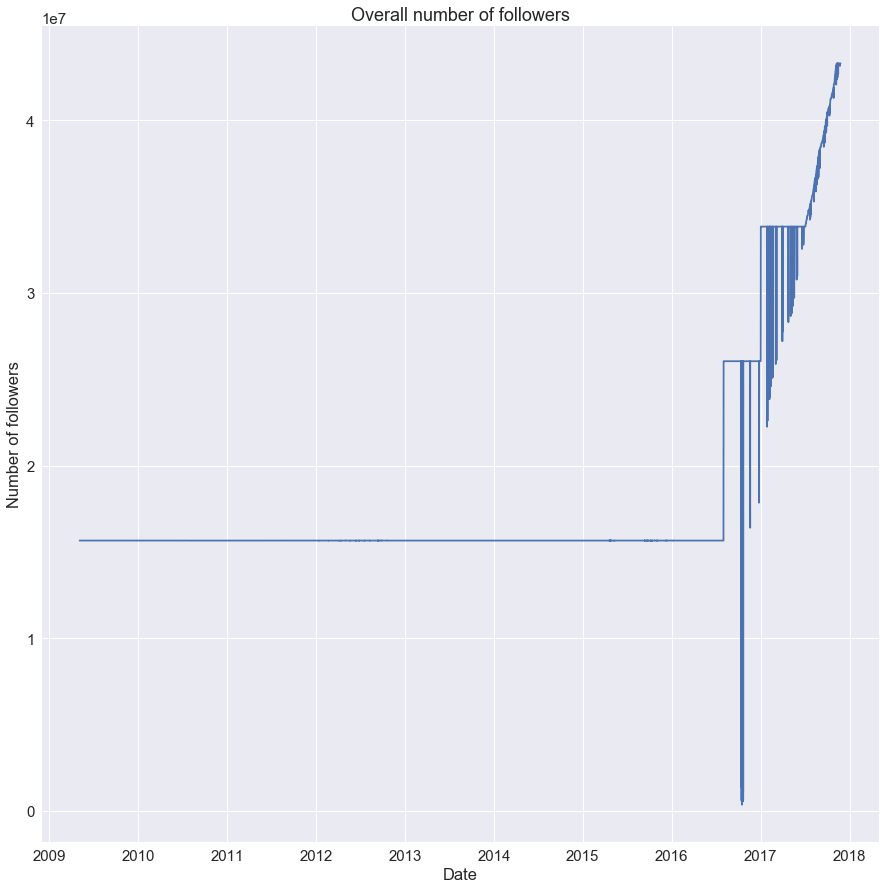

In [56]:
plot_followers(tweets)

We can notice many discrepancies in the provided data. One reason might be that the API used for data collection might have changed, and without using an official Twitter API - the data may be flawed. This would explain the very volatile behavior of the datapoints, as well as long stagnation prior to mid-2016.

The baseline can be seen [here](https://www.trackalytics.com/twitter/followers/widget/realdonaldtrump/). General outline of data from 2017 could correspond to the real data, but with many flaws it is not advised to use the number of followers as a raw number provided in the **Trump Twitter Archive**.

We will show a glimpse of number of followers in data from mid-2016 until today:

In [57]:
def plot_followers_from(tweets, from_date):
    '''
    Helper function that wraps the plotting of followers from twitter data, from the specified date.
    
    Parameters:
    tweets -- trump twitter dataframe
    from_date -- string or pandas timestamp
    '''
    x = []
    y = []

    tmp = tweets.loc[tweets.created_at>pd.Timestamp(from_date)]
    tmp.sort_values(by='created_at', ascending=True, inplace=True)
    
    # iterate through tweets and fetch date of creation and current number of followers
    for ind, row in tmp.iterrows():
        x.append(row['created_at'])
        y.append(row.user['followers_count'])
        
    plt.figure(figsize=(15,15))
    plt.plot(x,y)
    plt.title("Followers from "+from_date)
    plt.xlabel("Date")
    plt.ylabel("Number of followers")

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



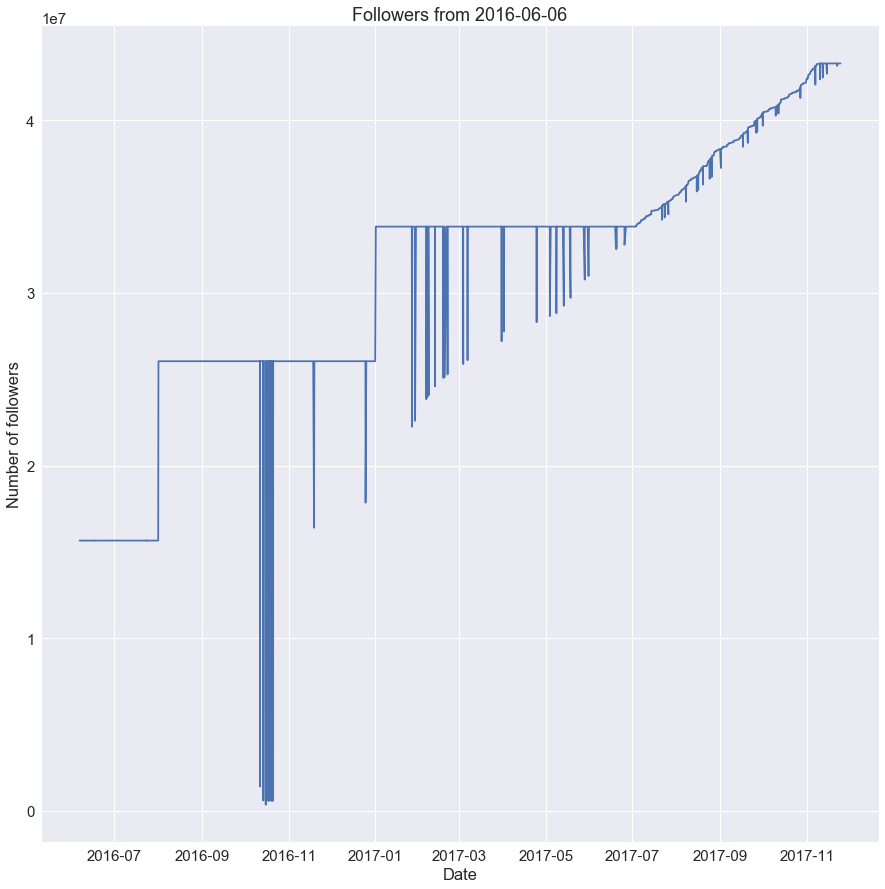

In [58]:
plot_followers_from(tweets, '2016-06-06')

We can see the previously mentioned volatility and sudden increase and decrease of followers, being less prominent from mid-2017. As mentioned, this can be a flaw in the data collection.

We can try to average the number of followers over certain periods, such as months to see whether that will reduce volatility.

In [53]:
def plot_avg_followers_from(tweets, from_date):
    '''
    Helper function for plotting the followers from tweet data, averaging over months to reduce volatility.
    '''
    x = []
    y = []

    tmp = tweets.loc[tweets.created_at>pd.Timestamp(from_date)]
    tmp.sort_values(by='created_at', ascending=True, inplace=True)
    
    # iterate through tweets and fetch date of creation and current number of followers
    for ind, row in tmp.iterrows():
        x.append(row['created_at'])
        y.append(row.user['followers_count'])
    
    avg_x = []
    avg_y = []
    cum = 0
    cnt = 0
    for ind, date in enumerate(x):
        if(cum==0):
            cum += y[ind]
            cnt += 1
        else:
            if(x[ind-1].month==x[ind].month):
                cum += y[ind]
                cnt += 1
            else:
                avg_x.append(x[ind-1])
                avg_y.append(cum/cnt)
                cum = 0 
                cnt = 0
    
    plt.figure(figsize=(15,8))
    plt.plot(avg_x,avg_y)
    plt.title("Average followers from "+from_date)
    plt.xlabel("Date")
    plt.ylabel("Number of followers")

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



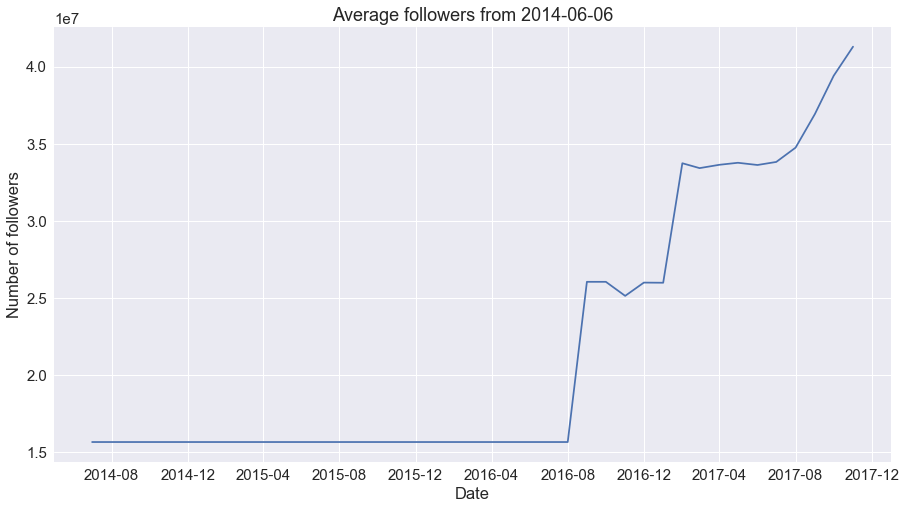

In [54]:
plot_avg_followers_from(tweets, '2014-06-06')

This has significantly reduced the discrepancy, and looks more like the baseline.

**Conclusion**: Using the number of followers from the datasets has caveats:
* it is very volatile per-tweet most probably caused by API inconsistencies
* the behavior becomes more similar to the baseline when averaging out over periods

In terms of using the Tweets to determine whether they have influenced the number of new followers or people unfollowing - this would not be recommended. On the other hand, as a general indicator of popularity, this data point can be used.

#### Tweets distribution over the years

As part of our analysis of the evolution of Trump's attitude reflected in his tweeting behaviour, a good insight would be how his tweet usage changed throughout the stages of media celebrity, presidency candidate and US president.

In this sense, we will look at the number of tweets over the months from 2009 to 2017. We choose months as the basic timespan because it is large enough in order to capture significant events that have an impact and additionally, this way, we can pinpoint the dates when Trump announced his candidacy as well as when he won the election.

In [28]:
tweets_expand_dates = tweets.copy()
tweets_expand_dates['year'] = tweets_expand_dates.created_at.dt.year
tweets_expand_dates['month'] = tweets_expand_dates.created_at.dt.month

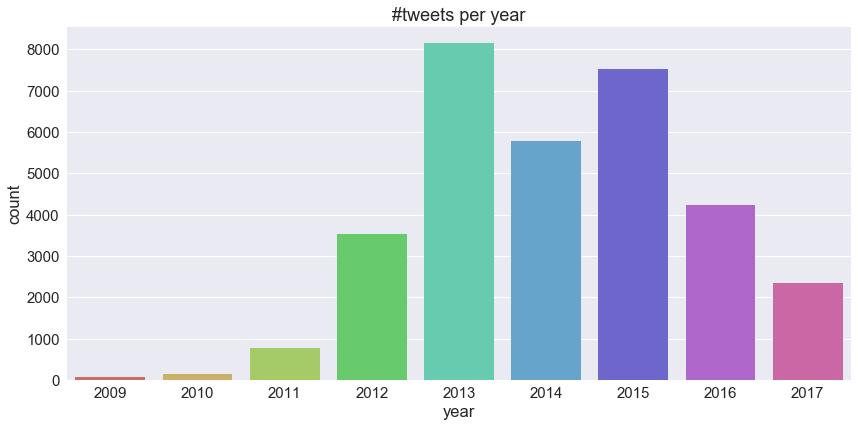

In [29]:
_  = sns.set(font_scale=1.5)
g = sns.factorplot(data=tweets_expand_dates, x='year',kind='count',\
               size=6, aspect=2, palette='hls')

ax = g.axes.flat[0]
_ = ax.set(title='#tweets per year')

We notice a clear decrease in the number of tweets afther he anounced his candidacy in 2015. Knowing that his happened in June of that year, we would like to see if there is a pattern at the month level.

We made the respective choice of colors in order to be easier to pinpoint the months when he announced his candidacy and when he won the election.

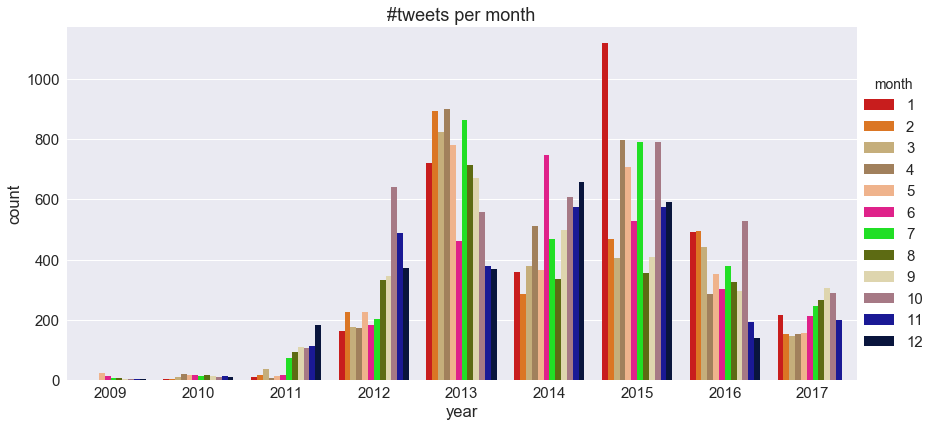

In [30]:
_ = sns.set(font_scale=1.5)
colors = ['red','orange','tan','light brown','peach','hot pink','bright green','olive green','beige',
         'mauve','royal blue','navy blue']
g = sns.factorplot(data=tweets_expand_dates, x='year',kind='count',\
               size=6, aspect=2, hue='month', palette=sns.xkcd_palette(colors))
ax = g.axes.flat[0]
ax.set(title='#tweets per month')

#_ = sns.factorplot(data=tweets_expand_dates, x='year',kind='count',\
#               size=6, aspect=2, hue='month')

There isn't an obvious change related strictly to the month of his candidacy anouncement, altough considering the data by year, there are clear changes over the months.

#### Followers engagement

Having looked over Trump's participation on the Twitter platform, we would now want to see how his followers are reacting to his tweets. There are two quantifiable forms of involvement with one's tweets of their followers recorded in our data: favorite count and retweet count. The favorite count is the number of accounts that liked the respective message and the retweet count is the number of accounts that shared the message on their page, possibly with an additional comment.

We will first look at the trends of his followers engagement over the years and then try to discover more indepth patterns of the most liked/retweeted ones.

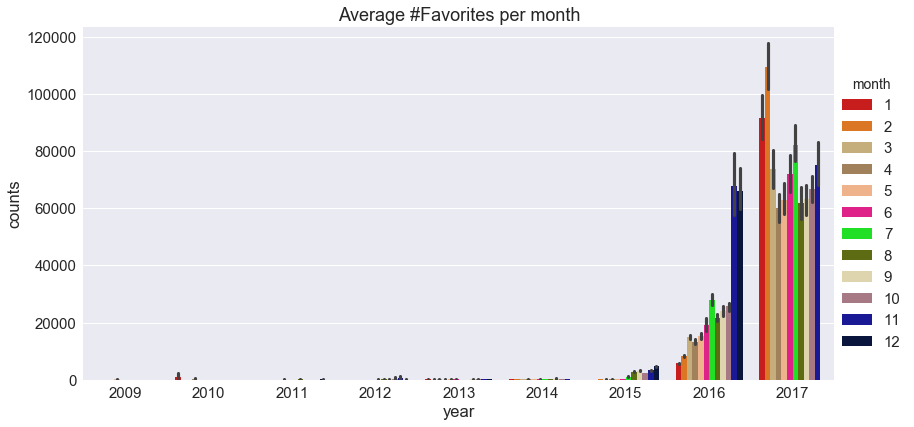

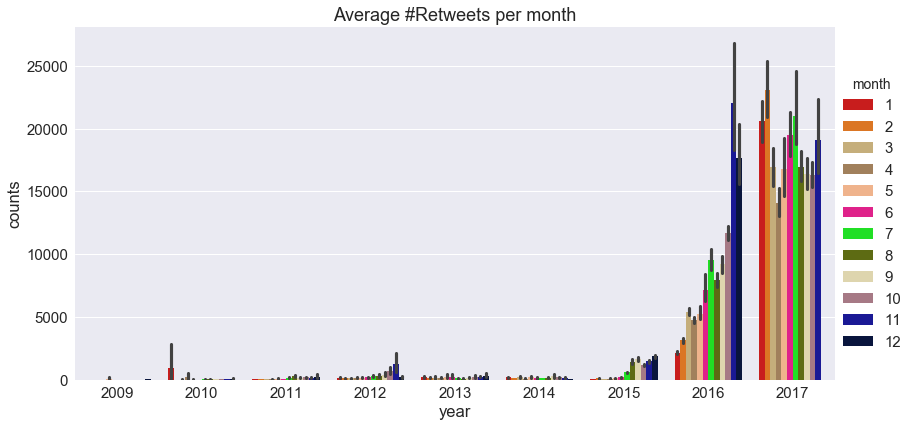

In [31]:
colors = ['red','orange','tan','light brown','peach','hot pink','bright green','olive green','beige',
         'mauve','royal blue','navy blue']
g = sns.factorplot(data=tweets_expand_dates, x='year',y='favorite_count',hue='month',kind='bar',size=6, aspect=2,
               palette=sns.xkcd_palette(colors))
ax = g.axes.flat[0]
ax.set(title='Average #Favorites per month',xlabel='year', ylabel='counts')

g = sns.factorplot(data=tweets_expand_dates, x='year',y='retweet_count',hue='month',kind='bar',size=6, aspect=2,
              palette=sns.xkcd_palette(colors))
ax = g.axes.flat[0]
_ = ax.set(title='Average #Retweets per month',xlabel='year',ylabel='counts')

We can see the corresponding points in time when he announced his candidacy as well as the point when he won the election are reflected in an increase interaction of his followers have with his tweets.

Now that we have insight into the evolution of Trump's twitter activity and his followers engagement, we would want to dig more into what are the patterns of his **most liked/retweeted** tweets. 

As a first step in our analysis, we make use of what our dataset records, specifically, we will analyze the the hashtags and user mentions in these tweets.

In [32]:
max_fav_tweets = tweets.sort_values(by='favorite_count', ascending=False)
max_ret_tweets = tweets.sort_values(by='retweet_count', ascending=False)

In [33]:
def extract_text_hashtags(hashtags_list):
    '''
    Utility function to extract the hashtag text from the hashtags list of a tweet
    '''
    texts = []
    for hashtag in hashtags_list:
        texts.append(hashtag['text'])
        
    return texts

def extract_name_mentions(usermentions_list):
    '''
    Utility function to extract the name rom the user mentions list of a tweet
    '''
    names = []
    for usermention in usermentions_list:
        names.append((usermention['name'], usermention['screen_name']))
        
    return names

In [34]:
hashtags_most_engaged = set()
_ = max_fav_tweets[:200].apply(
    lambda row:hashtags_most_engaged.update(extract_text_hashtags(row['entities']['hashtags'])), 
    axis=1)

usermentions_most_engaged = set()
_ = max_ret_tweets[:200].apply(
    lambda row:usermentions_most_engaged.update(extract_name_mentions(row['entities']['user_mentions'])), 
    axis=1)

In [35]:
display(hashtags_most_engaged)

{'AmericaFirst',
 'ElectionNight',
 'FNN',
 'FakeNews',
 'FraudNewsCNN',
 'HappyIndependenceDay',
 'InaugurationDay',
 'MAGA',
 'MarchForLife',
 'MarineOne',
 'MerryChristmas',
 'NeverForget',
 'StandForOurAnthem',
 'SuperBowl',
 'ThankAVet',
 'USA'}

Looking at the hashtags from the 200 most liked tweets, we can see that most related to the US in a patriotic sense, but there are a few hashtags in the top that break this pattern as they are related to tweets set as counter actions to some speculations (FNN, FakeNews, FraudNewsCNN)

In [36]:
display(usermentions_most_engaged)

{('ABC News', 'ABC'),
 ('CBS', 'CBS'),
 ('CNN', 'CNN'),
 ('Chuck Schumer', 'SenSchumer'),
 ('Donald J. Trump', 'realDonaldTrump'),
 ('FOX & friends', 'foxandfriends'),
 ('James Woods', 'RealJamesWoods'),
 ('Juanita Broaddrick', 'atensnut'),
 ('Lilian Tintori', 'liliantintori'),
 ('Mac', 'MacMiller'),
 ('Marco Rubio', 'marcorubio'),
 ('Mike', 'Fuctupmind'),
 ('Mike Pence', 'mike_pence'),
 ('NBC News', 'NBCNews'),
 ('Snoop Dogg', 'SnoopDogg'),
 ('The New York Times', 'nytimes')}

Analysing the users mentioned in his 200 tweets that received the most attention from his followers, we see that the news outlets that he considers as promoting fake news make up for the top 3. 

The next step would be to analyse the followers engagement over three different timespans: before his candidacy announcement, during his candidacy and after the election.

#### Device used to Tweet

We will in short explore what devices are being used by Donald Trump to post Tweets. It is very important to notice the possibility that multiple persons manage his account besides himself. We might get an insight of this at a later point.

In [37]:
tweets_by_source = tweets.groupby('source').aggregate({'index':'count', 'favorite_count':'sum', 
                                                       'retweet_count':'sum', 'created_at':'max'})

In [38]:
tweets_by_source.sort_values(by='index',ascending=False, inplace=True)
tweets_by_source

,index,favorite_count,retweet_count,created_at
source,,,,
"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",14545,82606306,24979311,2017-03-25 14:41:14
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",12175,14121231,7680769,2017-11-17 15:03:16
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",4230,165614858,47902412,2017-11-24 18:49:12
"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",483,60975,113396,2016-10-20 02:06:52
"<a href=""http://beta.twitlonger.com"" rel=""nofollow"">TwitLonger Beta</a>",405,13912,46680,2013-03-05 14:27:23
"<a href=""http://instagram.com"" rel=""nofollow"">Instagram</a>",133,109422,59863,2016-06-21 16:53:07
"<a href=""https://studio.twitter.com"" rel=""nofollow"">Media Studio</a>",108,6978222,1699112,2017-11-23 15:35:13
"<a href=""http://www.facebook.com/twitter"" rel=""nofollow"">Facebook</a>",105,16113,23581,2015-08-28 17:33:41
"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for BlackBerry</a>",97,56364,29824,2015-07-26 01:30:55


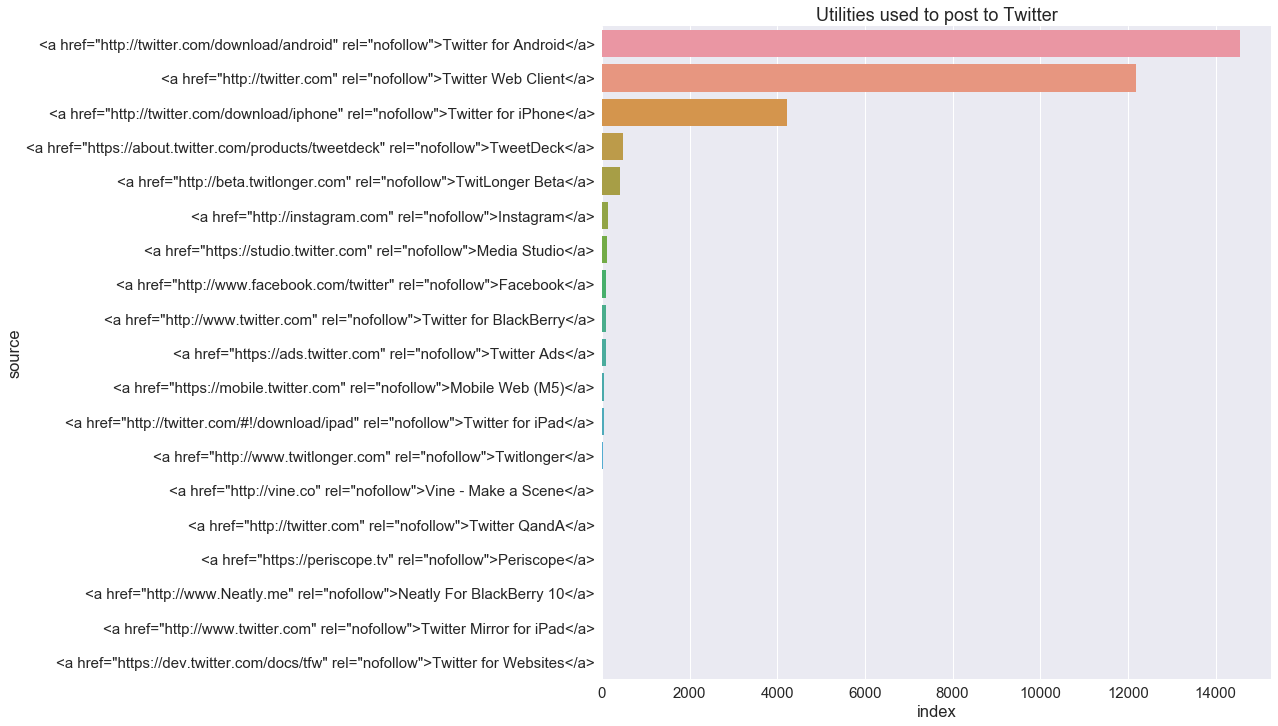

In [39]:
fig = plt.figure(figsize=(12,12))
p1 = sns.barplot(data=tweets_by_source.reset_index(), y='source', x='index')
p1.set_title('Utilities used to post to Twitter')

We can see that predominant utilities are:
* Twitter for Android - 14545 Tweets
* Twitter Web Client - 12175 Tweets
* Twitter for iPhone - 4230 Tweets

Other utilities are used significanlty less frequently. Other utilities are most probably used by PR team and staff members to post in the same account.

It is important to notice as well the timestamps of the latest tweets for each of the top utilities:
* Twitter for Android - **25.03.2017**
* Twitter Web Client - 2017-11-17
* Twitter for iPhone - 2017-11-24

From the news we have obtained the information Donald Trump predominantly used an Android phone. Due to security measures, Trump did [switch to iPhone in March](https://www.theguardian.com/technology/2017/mar/20/bye-bye-android-has-donald-trump-finally-upgraded-his-phone), as we can see from the Twitter data as well. 

In [40]:
tweets_android = tweets.loc[tweets.source=='<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>']
tweets_iphone = tweets.loc[tweets.source=='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>']

In [44]:
tweets_android_freq = tweets_android.groupby(tweets_android['created_at'].map(lambda x: x.date())).aggregate({'index':'count'})
tweets_iphone_freq = tweets_iphone.groupby(tweets_iphone['created_at'].map(lambda x: x.date())).aggregate({'index':'count'})

In [45]:
tweets_android_freq.describe()

,index
count,1318.00000
mean,11.03566
std,12.18197
min,1.00000
25%,3.00000
50%,7.00000
75%,14.00000
max,150.00000


In [48]:
tweets_iphone_freq.describe()

,index
count,739.000000
mean,5.723951
std,4.661101
min,1.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,43.000000


In [49]:
tweets_freq = pd.merge(left=tweets_android_freq.reset_index(), right=tweets_iphone_freq.reset_index(), how='outer', on='created_at',
                      suffixes=('_and', '_iph'))

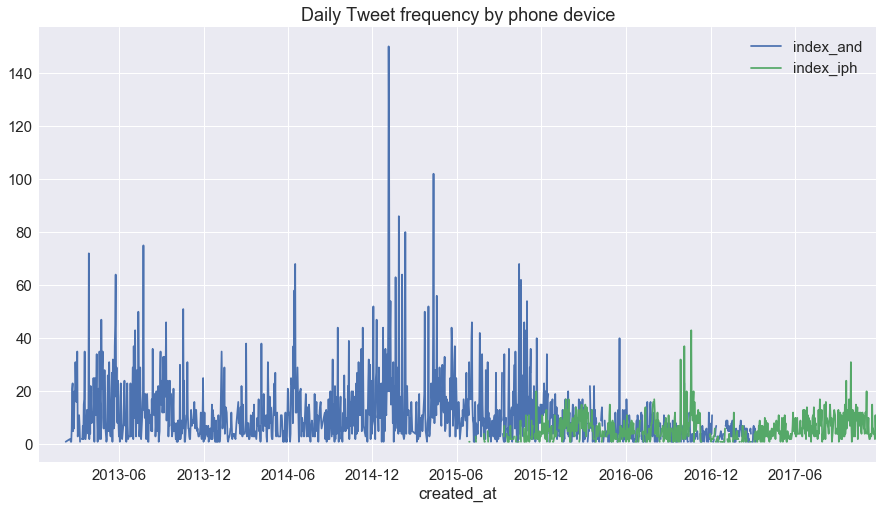

In [50]:
tweets_freq.plot(figsize=(15,8), x='created_at', y=['index_and', 'index_iph'], title='Daily Tweet frequency by phone device')

---

#### General trend of retweets and favorites

We will provide deeper insight into trends over time for number of retweets and favorites. 

Trump has announced candidacy on June 16th, 2015. We can observe that during his campaign his Twitter outreach has gained much traction, and peaking in his presidency.

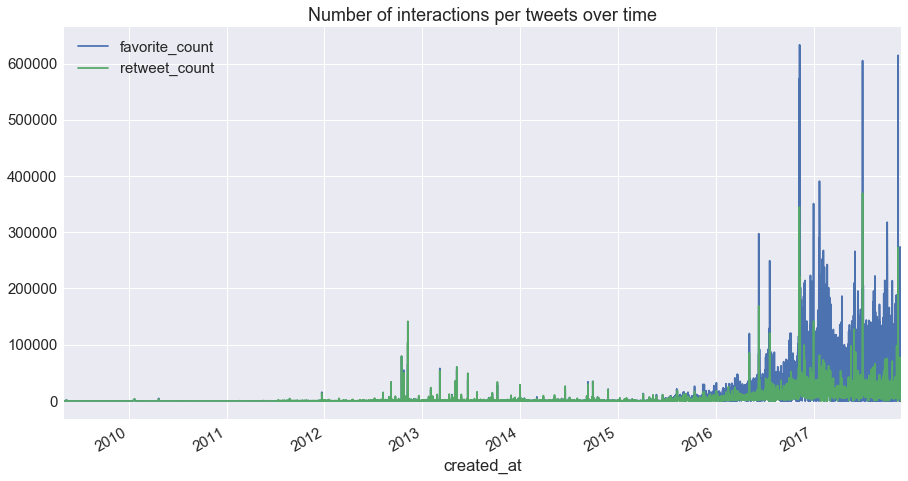

In [59]:
tweets.plot(x='created_at',y=['favorite_count','retweet_count'], figsize=(15,8), title='Number of interactions per tweets over time')

In [60]:
tweets.corr()

,index,contributors,favorite_count,favorited,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated,withheld_copyright
index,1.000000,NaN,-0.261322,0.000909,-0.221023,-0.221023,-0.302681,-0.302681,0.029904,0.029904,-0.039926,NaN,-0.730338,-0.730338,-0.258619,0.002473,-0.088296,NaN
contributors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorite_count,-0.261322,NaN,1.000000,-0.001854,0.534090,0.534090,0.773522,0.773522,-0.097066,-0.097066,0.024510,NaN,0.571317,0.571317,0.903566,-0.001004,0.142436,NaN
favorited,0.000909,NaN,-0.001854,1.000000,-0.009181,-0.009181,NaN,NaN,-0.017743,-0.017743,-0.000538,NaN,NaN,NaN,-0.001878,-0.000119,-0.000531,NaN
id,-0.221023,NaN,0.534090,-0.009181,1.000000,1.000000,0.999984,0.999984,0.050275,0.050275,0.105249,NaN,0.999156,0.999156,0.497248,-0.011119,0.149156,NaN
id_str,-0.221023,NaN,0.534090,-0.009181,1.000000,1.000000,0.999984,0.999984,0.050275,0.050275,0.105249,NaN,0.999156,0.999156,0.497248,-0.011119,0.149156,NaN
in_reply_to_status_id,-0.302681,NaN,0.773522,NaN,0.999984,0.999984,1.000000,1.000000,-0.002620,-0.002620,NaN,NaN,NaN,NaN,0.677532,NaN,NaN,NaN
in_reply_to_status_id_str,-0.302681,NaN,0.773522,NaN,0.999984,0.999984,1.000000,1.000000,-0.002620,-0.002620,NaN,NaN,NaN,NaN,0.677532,NaN,NaN,NaN
in_reply_to_user_id,0.029904,NaN,-0.097066,-0.017743,0.050275,0.050275,-0.002620,-0.002620,1.000000,1.000000,NaN,NaN,NaN,NaN,-0.086063,NaN,NaN,NaN
in_reply_to_user_id_str,0.029904,NaN,-0.097066,-0.017743,0.050275,0.050275,-0.002620,-0.002620,1.000000,1.000000,NaN,NaN,NaN,NaN,-0.086063,NaN,NaN,NaN


We can see a strong correlation between number of favorites and retweets: 0.903, and rather high correlation between favorite counts and if a tweet represents a reply to other tweed (in_reply_to_status): 0.773.

##### Observing different devices

Android device shows higher correlation between the retweet_count and favorite_count in comparison to iPhone. This is an indicator over the whole available period.

In [61]:
tweets_android.corr()

,index,contributors,favorite_count,favorited,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated,withheld_copyright
index,1.000000,NaN,-0.209567,NaN,-0.288227,-0.288227,-0.429274,-0.429274,-0.057367,-0.057367,-0.033505,NaN,-0.335665,-0.335665,-0.208648,-0.000660,NaN,NaN
contributors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorite_count,-0.209567,NaN,1.000000,NaN,0.458738,0.458738,-0.042335,-0.042335,-0.052756,-0.052756,-0.008615,NaN,0.805481,0.805481,0.928551,-0.000167,NaN,NaN
favorited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,-0.288227,NaN,0.458738,NaN,1.000000,1.000000,0.999992,0.999992,-0.000601,-0.000601,0.067833,NaN,0.999436,0.999436,0.424499,-0.008387,NaN,NaN
id_str,-0.288227,NaN,0.458738,NaN,1.000000,1.000000,0.999992,0.999992,-0.000601,-0.000601,0.067833,NaN,0.999436,0.999436,0.424499,-0.008387,NaN,NaN
in_reply_to_status_id,-0.429274,NaN,-0.042335,NaN,0.999992,0.999992,1.000000,1.000000,0.048942,0.048942,NaN,NaN,NaN,NaN,-0.048998,NaN,NaN,NaN
in_reply_to_status_id_str,-0.429274,NaN,-0.042335,NaN,0.999992,0.999992,1.000000,1.000000,0.048942,0.048942,NaN,NaN,NaN,NaN,-0.048998,NaN,NaN,NaN
in_reply_to_user_id,-0.057367,NaN,-0.052756,NaN,-0.000601,-0.000601,0.048942,0.048942,1.000000,1.000000,NaN,NaN,NaN,NaN,-0.066467,NaN,NaN,NaN
in_reply_to_user_id_str,-0.057367,NaN,-0.052756,NaN,-0.000601,-0.000601,0.048942,0.048942,1.000000,1.000000,NaN,NaN,NaN,NaN,-0.066467,NaN,NaN,NaN


In [63]:
tweets_iphone.corr()

,index,contributors,favorite_count,favorited,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated,withheld_copyright
index,1.000000,NaN,-0.300761,NaN,-0.600260,-0.600260,-0.714782,-0.714782,0.632876,0.632876,-0.027321,NaN,-0.832803,-0.832803,-0.292798,NaN,-0.117737,NaN
contributors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorite_count,-0.300761,NaN,1.000000,NaN,0.607803,0.607803,0.426674,0.426674,-0.300693,-0.300693,-0.035639,NaN,0.326156,0.326156,0.836132,NaN,0.028142,NaN
favorited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,-0.600260,NaN,0.607803,NaN,1.000000,1.000000,1.000000,1.000000,-0.382192,-0.382192,0.046756,NaN,0.997246,0.997246,0.505797,NaN,0.039069,NaN
id_str,-0.600260,NaN,0.607803,NaN,1.000000,1.000000,1.000000,1.000000,-0.382192,-0.382192,0.046756,NaN,0.997246,0.997246,0.505797,NaN,0.039069,NaN
in_reply_to_status_id,-0.714782,NaN,0.426674,NaN,1.000000,1.000000,1.000000,1.000000,-0.388579,-0.388579,NaN,NaN,NaN,NaN,0.317116,NaN,NaN,NaN
in_reply_to_status_id_str,-0.714782,NaN,0.426674,NaN,1.000000,1.000000,1.000000,1.000000,-0.388579,-0.388579,NaN,NaN,NaN,NaN,0.317116,NaN,NaN,NaN
in_reply_to_user_id,0.632876,NaN,-0.300693,NaN,-0.382192,-0.382192,-0.388579,-0.388579,1.000000,1.000000,NaN,NaN,NaN,NaN,-0.207234,NaN,NaN,NaN
in_reply_to_user_id_str,0.632876,NaN,-0.300693,NaN,-0.382192,-0.382192,-0.388579,-0.388579,1.000000,1.000000,NaN,NaN,NaN,NaN,-0.207234,NaN,NaN,NaN


In [64]:
tweets_android.describe()

,index,contributors,favorite_count,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,quoted_status_id,quoted_status_id_str,retweet_count,withheld_copyright
count,14545.000000,0.0,14545.000000,1.454500e+04,1.454500e+04,3.890000e+02,3.890000e+02,6.230000e+02,6.230000e+02,1059.0,7.500000e+01,7.500000e+01,14545.000000,0.0
mean,3220.319766,NaN,5679.361018,5.370612e+17,5.370612e+17,3.538708e+17,3.538708e+17,3.750395e+08,3.750395e+08,0.0,6.620411e+17,6.620411e+17,1717.381299,NaN
std,1971.763287,NaN,21479.172473,1.369348e+17,1.369348e+17,3.925776e+16,3.925776e+16,4.393801e+08,4.393801e+08,0.0,4.570474e+16,4.570474e+16,6360.198964,NaN
min,0.000000,NaN,0.000000,2.989727e+17,2.989727e+17,3.062027e+17,3.062027e+17,7.592510e+05,7.592510e+05,0.0,5.427798e+17,5.427798e+17,0.000000,NaN
25%,1615.000000,NaN,25.000000,4.136603e+17,4.136603e+17,3.319501e+17,3.319501e+17,4.342139e+07,4.342139e+07,0.0,6.295971e+17,6.295971e+17,12.000000,NaN
50%,3056.000000,NaN,63.000000,5.508489e+17,5.508489e+17,3.496798e+17,3.496798e+17,2.358398e+08,2.358398e+08,0.0,6.597538e+17,6.597538e+17,36.000000,NaN
75%,4706.000000,NaN,1569.000000,6.438053e+17,6.438053e+17,3.656097e+17,3.656097e+17,5.346555e+08,5.346555e+08,0.0,6.877747e+17,6.877747e+17,750.000000,NaN
max,7535.000000,NaN,633253.000000,8.456468e+17,8.456468e+17,5.913964e+17,5.913964e+17,2.800581e+09,2.800581e+09,0.0,7.937943e+17,7.937943e+17,344806.000000,NaN


In [65]:
tweets_iphone.describe()

,index,contributors,favorite_count,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,quoted_status_id,quoted_status_id_str,retweet_count,withheld_copyright
count,4230.000000,0.0,4230.000000,4.230000e+03,4.230000e+03,4.400000e+01,4.400000e+01,4.700000e+01,4.700000e+01,2140.0,1.280000e+02,1.280000e+02,4230.000000,1.0
mean,1525.073759,NaN,39152.448700,7.981213e+17,7.981213e+17,8.575028e+17,8.575028e+17,5.102945e+07,5.102945e+07,0.0,8.206528e+17,8.206528e+17,11324.447281,1.0
std,1146.586953,NaN,42075.025648,9.166685e+16,9.166685e+16,1.154885e+17,1.154885e+17,1.291833e+08,1.291833e+08,0.0,8.845818e+16,8.845818e+16,11817.905693,NaN
min,0.000000,NaN,0.000000,2.783081e+17,2.783081e+17,3.853585e+17,3.853585e+17,1.551360e+07,1.551360e+07,0.0,6.269045e+17,6.269045e+17,9.000000,1.0
25%,634.250000,NaN,6836.500000,7.159931e+17,7.159931e+17,8.564841e+17,8.564841e+17,2.507388e+07,2.507388e+07,0.0,7.439177e+17,7.439177e+17,3926.500000,1.0
50%,1273.500000,NaN,21741.000000,7.891893e+17,7.891893e+17,8.831823e+17,8.831823e+17,2.507388e+07,2.507388e+07,0.0,8.035289e+17,8.035289e+17,8634.000000,1.0
75%,2067.750000,NaN,64783.750000,8.858578e+17,8.858578e+17,9.136465e+17,9.136465e+17,2.507388e+07,2.507388e+07,0.0,9.102655e+17,9.102655e+17,15442.750000,1.0
max,6936.000000,NaN,605098.000000,9.341318e+17,9.341318e+17,9.336626e+17,9.336626e+17,8.787688e+08,8.787688e+08,0.0,9.339594e+17,9.339594e+17,369530.000000,1.0


We can see a significant difference in statistical structure of popularity indicators (retweet count and favorite count) between iPhone and Android device.

The reason we see this is because Android device has been used more frequently (14545 vs 4230), thus having more average tweets over time has tipped the scales in favor of the iPhone - having more focused tweets. 

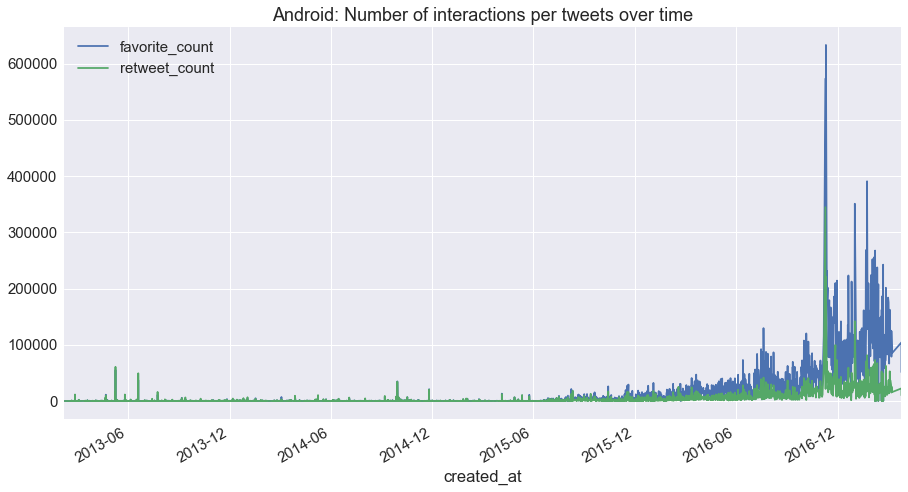

In [66]:
tweets_android.plot(x='created_at',y=['favorite_count','retweet_count'], figsize=(15,8), title='Android: Number of interactions per tweets over time')

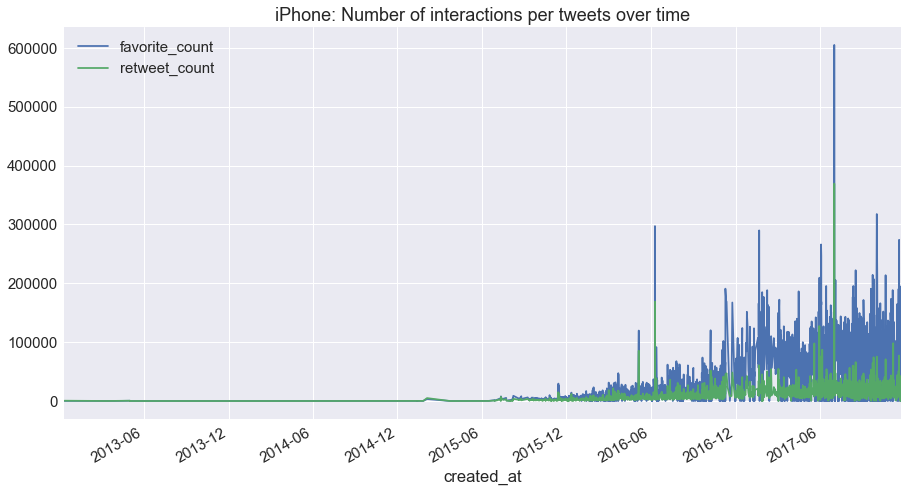

In [67]:
tweets_iphone.plot(x='created_at',y=['favorite_count','retweet_count'], figsize=(15,8), title='iPhone: Number of interactions per tweets over time')

## Internet archive - Trump TV news factchecks

In this section we will shortly describe the available data in the Internet archive - Trump TV news factchecks. Firstly, we will load the dataset, which we obtained as a CSV file. As described in the [documentation](https://archive.org/details/tv?factchecks), this is a rather simple dataset in structure, but with immense value in data. This dataset combines news reports on several persons in Trump administration to have a better overview of news.

The dataset has been obtained on 24.11.2017. 

In [68]:
news = pd.read_csv(NEWS_PATH)

news['Date of Airing (EST)'] = pd.to_datetime(news['Date of Airing (EST)'])

news.head()

,Date of Airing (EST),Topic List,Fact Check,TV Clip,Organization,Collection
0,2017-11-19,Taxes,http://www.politifact.com/truth-o-meter/statem...,https://archive.org/details/FOXNEWSW_20171119_...,PolitiFact,steve_mnuchin_archive
1,2017-11-16,"Taxes,Health Care",https://www.washingtonpost.com/news/fact-check...,https://archive.org/details/CSPAN2_20171116_10...,Washington Post,charles_schumer_archive
2,2017-11-14,"Health Care,Taxes",http://www.factcheck.org/2017/11/democrats-ina...,https://archive.org/details/CSPAN2_20171114_15...,FactCheck.org,charles_schumer_archive
3,2017-11-07,Guns,http://www.politifact.com/truth-o-meter/statem...,https://archive.org/details/CSPAN2_20171107_17...,PolitiFact,trumparchive
4,2017-11-06,Taxes,https://www.washingtonpost.com/news/fact-check...,https://archive.org/details/FOXNEWSW_20171107_...,Washington Post,paul_ryan_archive


We can observe 6 columns in this dataset:
* `Date of Airng (EST)` - the date of airing of specified clip, Eastern time
* `Topic List` - the list of general topics appearing in the clip
* `Fact Check` - the link to the fact check
* `TV Clip` - link of the news report clip
* `Organization` - organization which performed the fact check
* `Collection` - from which collection the clip comes from, represents the person from Trump administration

In [69]:
print('Number of clips:', news.shape[0])
print('Earliest date of airing:', news['Date of Airing (EST)'].min())

Number of clips: 1404
Earliest date of airing: 2009-09-18 00:00:00


We have a significant number (1404) of news coverages, along with general topics, going back as early as September 2009. 

**The time is Eastern Time, which coincides with the time zone setting for the Tweets of Donald Trump.**

#### Purpose of the dataset

Since we have date of airing and general topic of the news, we can analyze how Donald Trump reacts to news:
* his direct reaction
* his twitter interaction prior/after the airing
* does he mention certain people or topics at the time of some controversies

To get a general feeling about the topics, we will extract them from the dataset.

In [70]:
# we get the topic list column
topics = news['Topic List']

# we replace the NA values with ''
topics.fillna(value='', inplace=True)

If multiple topics are covered, they are represented as strings, delimited by comma `','`:

In [71]:
topics[2]

'Health Care,Taxes'

In order to extract meaningful results, we are interested to process and obtain some key elements from the dataset:
* unique topics overall
* counting the occurence of the topics
* obtaining overall topics with occurrence in news
* filtering such information in a given timeframe
* displaying top news topics

In continuation we provide the functions which provide such functionalities.

---

Extracting unique topics will enable us to analyze more easily what are all the topics that have been in the news about Trump and his cabinet. It enables us to explore some of the interesting topics in more detail by extracting and providing the topic list.

In [72]:
def extract_unique_topics(topics):
    '''
    Function for extracting unique topics from the topic interable object (pandas.Series).

    Parameters:
    topics -- iterable object containing topics

    Returns:
    set -- set of topics appearing in the dataset
    '''
    container = []
    
    for topic in topics:
        tmp = topic.split(',')
        container.extend(tmp)

    return set(container)

In [78]:
s = extract_unique_topics(topics)
print('Number of topics: ', len(s))
print('Some of the topics:')
for idx,el in enumerate(s):
    if(idx<20):
        print(el)

Number of topics:  277
Some of the topics:

Crime
Offshoring
Women
Labor Force
TV Ads
State of the Union
Murder
FBI
War
Legal Issues
Nuclear
Lee Harvey Oswald
Manufacturing
Eminent Domain
Polls
Government Leaks
Bipartisanship
Immigation
Budget Shortfall


Counting the frequency and occurence of certain topic can provide an insight on importance of certain topic overall or in a given period of time.

In [79]:
def count_occurence(topic_name, topics):
    '''
    Helper function for counting the occurence of certain topic among topics.
    
    Parameters:
    topic_name -- string, topic for which to count occurence
    topics -- list of topics per news from the news dataset, topics are comma delimited
    
    
    Returns:
    count -- integer, number of occurences
    
    '''
    count = 0
    
    for topic in topics:
        tmp = topic.split(',')
        if(topic_name in tmp):
            count += 1

    return count

Furthermore, we will provide a function which also gets the occurence for all the given sets of topics.

In [80]:
def get_occurence(topics_set, topics_series):
    '''
    Helper function to create a dictionary of topics (key) with occurence count (value).
    
    Parameters:
    topics_set -- python set, list of unique topics
    topics_series -- python list, complete list of topics from the news dataset
    
    Returns:
    occurences -- python dictionary, key - topic name, value - number of topic occurences
    '''
    occurences = {}
    
    for topic in topics_set:
        occurences[topic] = count_occurence(topic, topics_series)
        
    return occurences

A significant part of the analysis will rely on analyzing the news topics in certain timeframe, with a given start and end date of airing. We can filter the originally compiled dataframe by given criteria using a helper function.

In [81]:
def get_topics_in_period(news_df, start_date, end_date):
    '''
    A function for obtaining dataframe containing topics in the specified timeframe.
    
    Parameters:
    news_df -- news dataset dataframe
    start_date -- starting date to consider, pandas timestamp or valid string
    end_date -- ending date to consider, pandas timestamp or valid string
    
    Returns:
    topic_df -- dataframe containing a row of topics in selected period with their count
    '''
    # we filter the dataframe by dates
    news_copy = news_df.copy()
    news = news_copy.loc[(news_df['Date of Airing (EST)']>=pd.Timestamp(start_date)) &
                       (news_df['Date of Airing (EST)']<=pd.Timestamp(end_date))]
    
    # we get the topic list column
    topics = news['Topic List']

    # we replace the NA values with ''
    topics.fillna(value='', inplace=True)
    
    s = extract_unique_topics(topics)
    
    occurences = get_occurence(s, topics)
    
    topic_series = pd.Series(occurences)
    topic_df = pd.DataFrame(topic_series)

    topic_df.reset_index(inplace=True)
    topic_df.columns = ['topic','count']
    
    return topic_df

Finally, we define functions for displaying our data about news topics.

In [195]:
def show_top_topics(topic_df, number, year_title):
    '''
    A helper function for displaying selected number of top topics in given topic dataframe - using Seaborn.
    
    Parameters:
    topic_df -- topic dataframe containing topic and count, from the news dataset
    number -- number of top topics to consider
    year_title -- year for which the chart is obtained 
    
    Returns:
    nothing
    '''
    topic_df_sorted = topic_df.sort_values(by='count', ascending=False)
    
    if(number>topic_df.shape[0]):
        number = topic_df.shape[0]
    
    top = topic_df_sorted[number:0:-1]
    
    plt.figure(figsize=(15,8))

    p = sns.barplot(data=top, x='count', y='topic')
    p.set_title('Top '+str(number)+' topics in year '+str(year_title))
    
    
def show_top_topics_plotly(topic_df, number, year_title):
    '''
    A helper function for displaying selected number of top topics in given topic dataframe - using Plotly.
    
    Parameters:
    topic_df -- topic dataframe containing topic and count, from the news dataset
    number -- number of top topics to consider
    year_title -- year for which the chart is obtained 
    
    Returns:
    nothing, saves the charts in html folder.
    '''
    topic_df_sorted = topic_df.sort_values(by='count', ascending=False)
    
    if(number>topic_df.shape[0]):
        number = topic_df.shape[0]
    
    top = topic_df_sorted[number:0:-1]
    
    data = [go.Bar(
            y=top['topic'],
            x=top['count'],
            orientation='h'
    )]
    
    layout = go.Layout(
        title = 'Top '+str(number)+' topics in year '+str(year_title),
        yaxis = {'title': 'Topic'},
        xaxis = {'title': 'Count'},
    )
    
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.plot(fig, filename='html/top_topics'+str(year_title)+'.html')
    display(IFrame('html/top_topics'+str(year_title)+'.html', "100%", "500px"))
    
    
def show_top_topics_plotly_bar(topic_df, number, title, file_name):
    '''
    A helper function for displaying selected number of top topics in given topic dataframe - using Plotly.
    
    Parameters:
    topic_df -- topic dataframe containing topic and count, from the news dataset
    number -- number of top topics to consider
    title -- title to display
    file_name -- name of the output html file.
    
    Returns:
    nothing, saves the charts in html folder.
    '''
    topic_df_sorted = topic_df.sort_values(by='count', ascending=False)
    
    if(number>topic_df.shape[0]):
        number = topic_df.shape[0]
    
    top = topic_df_sorted[0:number:1]
    
    data = [go.Bar(
            y=top['topic'],
            x=top['count'],
            orientation='h'
    )]
    
    layout = go.Layout(
        title = title,
        yaxis = {'title': 'Topic'},
        xaxis = {'title': 'Count'},
    )
    
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.plot(fig, filename='html/'+file_name)
    display(IFrame('html/'+file_name, "100%", "500px"))

We observe a variety of topics:
* about 270 different topics
* some of the topics contain typos
* it is a good basis for future NLP and reactions - since content of the news is summaized

#### Trump administration topics:

With this dataset we can show the main topics covered by news outlets on the Trump administration. 

This can be especially interesting in terms of extracting the most prominent topics in certain years or specified time period.

So what are the topics of Trump and Trump administration?

In [86]:
occurences = get_occurence(s, topics)

In [87]:
occurences

{'': 3,
 '. Noncitizen voting': 1,
 'Abortion': 7,
 'Affordable Care Act': 3,
 'Afghanistan': 3,
 'Afghanistant': 1,
 'Agriculture': 2,
 'Autism': 3,
 'Auto Industry': 1,
 'Aviation': 1,
 'Benghazi': 3,
 'Biography': 6,
 'Bipartisanship': 1,
 'Birthright Citizenship': 1,
 'Black Vote': 1,
 'Bond Rating': 1,
 'Boycott': 1,
 'Budget Shortfall': 1,
 'Budgets': 1,
 'Bush Tax Cuts': 1,
 'Business': 1,
 'CIA': 2,
 'Campaign': 7,
 'Campaign Contributions': 1,
 'Campaign Finance': 20,
 'Campaign Finance Laws': 1,
 'Campaign Financing': 1,
 'Campaign Protests': 1,
 'Campign Finance': 1,
 'Canada': 2,
 'Candidate Biography': 60,
 'Carbon Dioxide': 2,
 'Carbon Emissions': 2,
 'Casino Gambling': 1,
 'Census': 1,
 'Chemical Weapons': 2,
 'Child Care': 1,
 'Childre': 1,
 'Children': 13,
 'China': 21,
 'Citizenship': 1,
 'City Government': 1,
 'Civil Rights': 33,
 'Climate Change': 44,
 'Clinton Emails': 21,
 'Clinton Foundation': 1,
 'Clinton on Trump and Equal Pay': 1,
 'Coal': 11,
 'Common Core': 

We will convert the dictionary to dataframe for easier manipulation.

In [92]:
topic_series = pd.Series(occurences)
topic_df = pd.DataFrame(topic_series)

topic_df.reset_index(inplace=True)
topic_df.columns = ['topic','count']

In [95]:
topic_df.head(10)

,topic,count
0,,3
1,. Noncitizen voting,1
2,Abortion,7
3,Affordable Care Act,3
4,Afghanistan,3
5,Afghanistant,1
6,Agriculture,2
7,Autism,3
8,Auto Industry,1
9,Aviation,1


What are the top 50 topics in news, by frequency?

In [96]:
topic_df_sorted = topic_df.sort_values(by='count', ascending=False)

top_50 = topic_df_sorted[50:0:-1]

In [101]:
top_50.sort_values(by='count', ascending=False).head()

,topic,count
99,Foreign Policy,158
116,Health Care,142
147,Jobs,130
72,Economy,119
236,Taxes,110


We will show top 50 topics as a bar chart, to more easily convey the importance of certain topics by frequency.

In [98]:
data = [go.Bar(
            y=top_50['topic'],
            x=top_50['count'],
            orientation='h'
    )]
    
layout = go.Layout(
        title = 'Top 50 news topics of Trump',
        yaxis = {'title': 'Topic'},
        xaxis = {'title': 'Count'},
    )
    
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='html/top50_topics.html')
display(IFrame('html/top50_topics.html', "100%", "800px"))

## Topics of Donald Trump administration (since January 20, 2017)

We are interested in topics of Donald Trump administration, what has been in the news, what topics, since he took over as POTUS.

In [102]:
trump_admin = get_topics_in_period(news, '2017-01-20', '2018-01-01')

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [105]:
show_top_topics_plotly_bar(trump_admin, 20, 'Top 20 Trump administration news topics', 'top_20_administration_news.html')

#### An overview of news topics over years

In [106]:
for i in range(2009, 2018):
    tmp = get_topics_in_period(news, str(i)+'-01-01', str(i)+'-12-31')
    show_top_topics_plotly(tmp, 10, i)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# How does Trump react to the events in the news?

We are interested in finding how Donald Trump reacts on his Twitter to certain topics that appear in the news. To achieve this, we tackle the problem from two sides, asking the questions:
* when Trump tweets about certain topics, what is in news?
* when there are certain topics in news, what does Trump tweet about? 

The first question would provide an insight of possible manipulation of his followers, if he tweets of certain explosive topics which do not correlate anyhow to what is in news, in order to distract people. This perspective should provide an insight when he uses certain hashtags and people to fight off some topics in news.

The second question strives to have an overview of whom does Trump mention and what hashtags he uses when certain topics are in the news. This is a more general overview, based on the news topics to see if they provoke a typical reaction and sentiment, and how Trump expresses it in his tweets.


We define helper functions to extract mentions and hashtags from the tweets in the specified timeframe.

In [110]:
def mentions_hashtags_in_period(tweets, from_date, to_date):
    '''
    A function to retrieve all mentions and hashtags from the tweets between specified dates.
    
    Parameters:
    tweets -- Twitter API based dataframe
    from_date -- starting date to consider (valid string or pandas timestamp)
    to_date -- ending date to consider (valid string or pandas timestamp)
    
    Returns:
    mentions -- python list of mentions entity objects
    hashtags -- python list of hashtags entity objects
    '''
    tweets_in_period = tweets.loc[(tweets.created_at>=pd.Timestamp(from_date)) & (tweets.created_at<=pd.Timestamp(to_date))]
    
    mentions = []
    hashtags = []
    
    for idx, tweet in tweets_in_period.iterrows():
        for mention in tweet.entities['user_mentions']:
            mentions.append(mention)
        
        for hashtag in tweet.entities['hashtags']:
            hashtags.append(hashtag)
    
    return mentions, hashtags

In [107]:
# in case we want to observe only from the announcement of the candidacy
tweets_2015 = tweets.loc[tweets.created_at>pd.Timestamp('2015-01-01')]

We define helpers to find news with specified topics, as well as news with specified topics in selected timeframe.

In [111]:
def find_news_with_topics(news, topic_list):
    '''
    Function for retrieving all the news that contain any of the topics specified in the list.
    
    Parameters:
    news -- news dataset dataframe
    topic_list -- python list of strings specifying topics
    
    Returns:
    ret_list -- python list containing rows of news dataframe
    '''
    ret_list = []
    
    for topic in topic_list:
        for idx, row in news.iterrows():
            if(topic in row['Topic List'].split(',')):
                ret_list.append(row)
                
    return ret_list


def find_news_with_topics_timeframe(news, topic_list, from_date, to_date):
    '''
    Function for retrieving all the news that contain any of the topics specified in the list, in the given timeframe.
    
    Parameters:
    news -- news dataset dataframe
    topic_list -- python list of strings specifying topics
    from_date -- starting date to consider (valid string or pandas timestamp)
    to_date -- ending date to consider (valid string or pandas timestamp)
    
    Returns:
    ret_list -- python list containing rows of news dataframe
    '''
    news_timeframe = news.loc[(news['Date of Airing (EST)']>=pd.Timestamp(from_date)) & (news['Date of Airing (EST)']<=pd.Timestamp(to_date))]
    
    return find_news_with_topics(news_timeframe, topic_list)

Here we demonstrate this function, it returns a list of news in the specified timeframe, containing either topics of Russia or Legal Issues. We display only first 3 entries.

In [112]:
find_news_with_topics_timeframe(news, ['Russia','Legal Issues'],'2017-06-06','2017-10-06')[:3]

[Date of Airing (EST)                                  2017-08-06 00:00:00
 Topic List                     North Korea,China,Russia,Homeland Security
 Fact Check              http://www.politifact.com/truth-o-meter/statem...
 TV Clip                 https://archive.org/details/CNNW_20170806_0900...
 Organization                                                   PolitiFact
 Collection                                                   trumparchive
 Name: 163, dtype: object,
 Date of Airing (EST)                                  2017-08-03 00:00:00
 Topic List                                  Clinton Emails,Nuclear,Russia
 Fact Check              http://www.factcheck.org/2017/08/factchecking-...
 TV Clip                 https://archive.org/details/CSPAN_20170803_230...
 Organization                                                FactCheck.org
 Collection                                                   trumparchive
 Name: 166, dtype: object,
 Date of Airing (EST)                         

 ### What is in the news when Trump tweets about certain topics?
 
 When Trump tweets about certain subjects or people, what might be in the news - what topics are covered? 
 
 In order to find out, we will extract the tweets with manually specified mentions, hashtags or containing some text we specify. Afterwards we scan the news near the creation time (with specified period of +- days to consider) and collect the topics.
 
To achieve that and get a general sense of whom or what general topic does tweet address, we will first define utility functions to extract tweets of interest:
* containing specified mentions - screen names
* containing specified hashtags - text display
* containing specified parts of text

In [113]:
def get_tweets_mentions_hashtags(tweets, mentions, hashtags, text_parts):
    '''
    Function to get tweets with any of the names in the list of mentions, any of the names in hashtags and
    any of the text in textual parts of the tweet.
    
    Parameters:
    tweets -- Twitter API based dataframe
    mentions -- python list of strings of screen names to match
    hashtags -- python list of strings of hashtag texts to match
    text_parts -- python list of strings of part of tweet text to match
    
    Returns:
    ret_list -- python list of tweets dataframe rows satisfying any of the conditions
    '''
    ret_list = []
    
    for idx, tweet in tweets.iterrows():
        check = False
        for t in tweet.entities['hashtags']:
            if(t['text'] in hashtags):
                check = True
                break
        
        for t in tweet.entities['user_mentions']:
            if(t['screen_name'] in mentions):
                check = True
                break
        
        for t in text_parts:
            if(type(tweet.text)==str):
                if(t in tweet.text.lower()):
                    check = True
            else:
                if(t in tweet.full_text.lower()):
                    check = True
        
        if(check):
            ret_list.append(tweet)
    
    return ret_list   

When having the set of tweets with desired elements, we can then proceed to extracting the topics from the news which have been published in a certain time period after the tweet.

In [115]:
def get_topics_tweet(extracted_tweets, news, days_delta):
    '''
    Function for finding the topics in the news in the date around the creation date of a tweet, 
    in a given timeframe of specified number of days.
    
    Parameters:
    extracted_tweets -- python list of Twitter API dataframe rows
    news -- dataframe of news
    days_delta -- maximum number of days to consider after the creation of the tweet 
    
    Returns:
    topics_tweet -- python list of string
    '''
    topics_tweet = []

    for et in extracted_tweets:
        start_date = et.created_at# - pd.Timedelta(days=days_delta) - be strict to have more confidence in results
        end_date = et.created_at + pd.Timedelta(days=days_delta)
        topics_tweet.append(get_topics_in_period(news, start_date, end_date))
        
    return topics_tweet

# to make our life easier, we define a wrapper for both topics and tweets
def get_news_topics_for_tweet_topics(news, tweets, mentions, hashtags, text_parts, max_days_apart):
    '''
    Gets topics from the news in the date around when tweets were published, +- max_days apart.
    We filter all the tweets to select by providing lists of mentions, hashtags or parts of text to contain.
    
    Parameters:
    news -- news dataframe
    tweets -- tweets dataframe
    mentions -- python list of strings
    hashtags -- python list of strings
    text_parts -- python list of strings
    max_days_apart -- integer
    
    Returns:
    aggregated_df -- returns a dataframe with aggregated topics and their counts summed
    selected_tweets -- python list of dataframe rows containing selected tweets with the given criteria
    '''
    selected_tweets = get_tweets_mentions_hashtags(tweets, mentions, hashtags, text_parts)
    
    topics = get_topics_tweet(selected_tweets, news, max_days_apart)
    
    topics_df = pd.DataFrame()
    
    for topic in topics:
        topics_df = topics_df.append(topic)
        
    aggregated_df = topics_df.groupby('topic').aggregate('sum').sort_values('count', ascending=False)
    
    return aggregated_df, selected_tweets

We will demonstrate the principle by collecting the news topics when some of the fake news elements appear in his tweets, namely:
* hashtags: FNN, FakeNews, FraudNewsCNN
* text contains: fake news
* we observe the news 2 days before and after tweet was published

We can possibly see what topics he considers fake news, if certain topics appear more frequently than others:

In [117]:
fake_news, fake_tweets = get_news_topics_for_tweet_topics(news, tweets_2015, [], ['FNN','FakeNews','FraudNewsCNN'], ['fake news'], 2)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [118]:
fake_news.head(10)

,count
topic,
Immigration,93.0
Health Care,70.0
Jobs,68.0
Taxes,65.0
Homeland Security,63.0
Economy,47.0
Crime,47.0
Nuclear,43.0
Trade,36.0


We can observe what topics are in the news around the time Trump tweets about fake news - mostly very serious and controversial topics for Trump's cabinet.

In [120]:
len(fake_tweets)

144

He has tweeted about fake news 144 times, while we will also show the distribution over time, since 2015.

For that we will introduce helper functions to aggregate and show data.

In [150]:
def dataframe_tweets_topics(extracted_tweets):
    dct = {}
    
    # aggregating over dates
    for t in extracted_tweets:
        key = t['created_at'].date()

        if key in dct:
            dct[key] += 1
        else:
            dct[key] = 1
    
    p_df = pd.DataFrame.from_dict(dct, orient='index').reset_index()
    p_df.columns = ['date', 'value']
    
    return p_df

In [151]:
fake_df = dataframe_tweets_topics(fake_tweets)

In [156]:
def show_tweets_plotly_file(tweets_df, title, file_name):
    '''
    A helper function for displaying tweet frequencies for certain topics.
    
    Parameters:
    topic_df -- topic dataframe containing topic and count, from the news dataset
    number -- number of top topics to consider
    title -- title to display
    file_name -- name of the output html file.
    
    Returns:
    nothing, saves the charts in html folder.
    ''' 
    data = [go.Scatter(
                x = tweets_df['date'],
                y = tweets_df['value'],
                mode = 'lines',
                name = 'lines'
            )]
    
    layout = go.Layout(
        title = title,
        yaxis = {'title': 'Number'},
        xaxis = {'title': 'Date'},
    )
    
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.plot(fig, filename='html/'+file_name)
    display(IFrame('html/'+file_name, "100%", "500px"))

In [158]:
show_tweets_plotly_file(fake_df, '"Fake news" tweets frequency', 'fake_tweet_freq.html')

We are also interested in stronger evidence about the correlation of fake news tweets with news topics. For that we will observe the news in the whole period, from the first to the last tweet containing certain topic, extracting the news topics in period and then looking at their significance.

In [159]:
def find_start_end_date(tweets):
    '''
    Helper function for finding the earliest and latest date of creation in list of tweets.
    
    Parameters:
    tweets -- python list of tweets (tweets dataframe rows)
    
    Returns:
    date_min -- pandas timestamp, earliest date among tweets
    date_max -- pandas timestamp, latest date among tweets
    '''
    date_min = tweets[0].created_at
    date_max = tweets[0].created_at
    
    for t in tweets:
        if(t.created_at<date_min):
            date_min = t.created_at
        if(t.created_at>date_max):
            date_max = t.created_at
            
    return date_min, date_max


def normalize_df(df):
    '''
    Function for normalization of dataframe counts - obtaining the percentage (ratios).
    
    Parameter:
    df -- dataframe with column named 'count' to obtain the ratios expressed as percentage
    
    Returns:
    ret_df -- dataframe with column named 'count' expressed as ratios in percentage
    '''
    s = df['count'].sum()
    
    ret_df = df.copy()
    
    ret_df['count'] = ret_df['count']/s*100
    
    return ret_df


def get_topics_percentage(topics):
    '''
    Helper function for getting the counts of topics as percentages.
    '''
    tmp = topics.groupby('topic').sum().sort_values(by='count',ascending=False)
    s= float(tmp['count'].sum())
    tmp['count'] = tmp['count']/s*100
    return tmp


def get_topic_count(topics):
    '''
    Helper function for getting the counts for topics.
    '''
    tmp = topics.groupby('topic').sum().sort_values(by='count',ascending=False)
    return tmp


def check_increase_in_mentions(general_topics, news_percentage):
    '''
    Function for obtaining the multiplier between the general topics in tweets and the topics provided from the news.
    '''
    tmp = general_topics.join(news_percentage, lsuffix='_topics', rsuffix='_tweets')
    
    tmp['multiplier'] = tmp['count_tweets']/tmp['count_topics']
    
    return tmp.sort_values(by=['multiplier'], ascending=False)


def check_delta_in_mentions(general_topics, news_percentage):
    '''
    Function for obtaining the difference between the general topics in tweets and the topics provided from the news.
    '''
    tmp = general_topics.join(news_percentage, lsuffix='_topics', rsuffix='_tweets')
    
    tmp['delta'] = tmp['count_tweets']-tmp['count_topics']
    tmp['ratio'] = tmp['count_tweets']/tmp['count_topics']
    
    return tmp.sort_values(by=['ratio','delta'], ascending=False)


def extract_hashtags_tweets(df):
    '''
    Helper function for extracting the hashtag text with counts from the dataframe, returning a combined dataframe.
    '''
    ret_ht = {}
    
    for idx, row in df.iterrows():
        for ht in row['hashtags']:
            if(ht['text'] in ret_ht):
                ret_ht[ht['text']] += 1
            else:
                ret_ht[ht['text']] = 1
    
    df = pd.DataFrame.from_dict(ret_ht, orient='index')
    df.columns = ['count']
    
    return df.sort_values(by=['count'],ascending=False)


def extract_mentions_tweets(df):
    '''
    Helper function for extracting the hashtag text with counts from the dataframe, returning a combined dataframe.
    '''
    ret_ht = {}
    
    for idx, row in df.iterrows():
        for ht in row['mentions']:
            if(ht['screen_name'] in ret_ht):
                ret_ht[ht['screen_name']] += 1
            else:
                ret_ht[ht['screen_name']] = 1
    
    df = pd.DataFrame.from_dict(ret_ht, orient='index')
    df.columns = ['count']
    
    return df.sort_values(by=['count'],ascending=False)

In [160]:
date_min, date_max = find_start_end_date(fake_tweets)

We can see the raw number for topics covered. We are interested in the percentage among all the topics, if there is a noticable signal in the topics.

In [161]:
fake_news_percentage = normalize_df(fake_news)

In [162]:
fake_news_percentage.head(10)

,count
topic,
Immigration,6.940299
Health Care,5.223881
Jobs,5.074627
Taxes,4.850746
Homeland Security,4.701493
Economy,3.507463
Crime,3.507463
Nuclear,3.208955
Trade,2.686567


We need a baseline to compare these percentages to. We can take the percentage of topics present in the news about Trump administration overall.

In [163]:
general_topics = get_topics_percentage(get_topics_in_period(news_df=news, start_date=date_min, end_date=date_max))

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



We have obtained the topics from the news in the period, and converted them to percentages in terms of topics.

In [164]:
general_topics.head(10)

,count
topic,
Immigration,6.734007
Homeland Security,5.521886
Jobs,5.454545
Health Care,5.050505
Taxes,4.242424
Foreign Policy,3.434343
Russia,3.299663
Elections,3.164983
Crime,3.097643


In [173]:
tmp.sort_values('count_tweets', ascending=False).head(10)

,count_topics,count_tweets,multiplier
topic,,,
Immigration,6.734007,6.940299,1.030634
Health Care,5.050505,5.223881,1.034328
Jobs,5.454545,5.074627,0.930348
Taxes,4.242424,4.850746,1.143390
Homeland Security,5.521886,4.701493,0.851429
Economy,2.828283,3.507463,1.240139
Crime,3.097643,3.507463,1.132300
Nuclear,1.212121,3.208955,2.647388
Trade,2.087542,2.686567,1.286952


We can observe a tendency that in the Tweets containing fake news, the frequency of news topics in the days after publishing is for most topics similar.

This is somewhat expected, since we are only sampling a subset of general topics. If the tweets are frequent enough, the distribution will be similar.

We will thus look into raw numbers to check how the counts in subsample of general news topics in time of publishing of the tweets compares to ones in general distribution of topics through time.

In [175]:
fake_tmp = check_delta_in_mentions(get_topic_count(get_topics_in_period(news_df=news, start_date=date_min, end_date=date_max)), fake_news)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [176]:
fake_tmp.sort_values(by='count_tweets', ascending=False).head(10)

,count_topics,count_tweets,delta,ratio
topic,,,,
Immigration,100,93.0,-7.0,0.930000
Health Care,75,70.0,-5.0,0.933333
Jobs,81,68.0,-13.0,0.839506
Taxes,63,65.0,2.0,1.031746
Homeland Security,82,63.0,-19.0,0.768293
Crime,46,47.0,1.0,1.021739
Economy,42,47.0,5.0,1.119048
Nuclear,18,43.0,25.0,2.388889
Trade,31,36.0,5.0,1.161290


We can observe the rations and deltas between counts of news topics from the date of first tweet containing "fake news" to the last one. Count tweets only takes into consideration news topics only after certain number of days from publishing of the tweets. We can see that even in absolute numbers certain topics have significant overlapping, if not even more mentions through multiple tweets.

This might show a significance of what is deemed fake, although a better hypothesis testing is necessary, especially in terms of baseline. Currenlty, with average over time and changing news topics and fluidity of social phenomena, this might not show a signal certain enough.

In [177]:
fake_news1, fake_tweets1 = get_news_topics_for_tweet_topics(news, tweets_2015, [], ['FNN','FakeNews','FraudNewsCNN'], ['fake news'], 1)
fake_news5, fake_tweets5 = get_news_topics_for_tweet_topics(news, tweets_2015, [], ['FNN','FakeNews','FraudNewsCNN'], ['fake news'], 5)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



A possible insight is provided by observing different time periods ahead, from the date of publishing of the tweet. We collect news topics in the interval of 1 and 5 days from the creation of the tweets.

We are interested how the topics in the news change, in short and longer term. In shorter term we might observe the actual topics reacted to. In longer term we might see news topics developing.

In [178]:
fake_news1.head(10)

,count
topic,
Immigration,48.0
Taxes,41.0
Health Care,36.0
Jobs,33.0
Economy,29.0
Homeland Security,23.0
Crime,23.0
Terrorism,21.0
Federal Budget,20.0


In [199]:
show_top_topics_plotly_bar(topic_df=fake_news1.reset_index(), number=20, 
                           file_name="topics1days_fake.html", title="News topics, up to 1 days after Tweet")

In [188]:
fake_news5.sort_values('count', ascending=False).head(10)

,count
topic,
Immigration,194.0
Jobs,186.0
Environment,186.0
Climate Change,176.0
Homeland Security,156.0
Taxes,144.0
Health Care,132.0
Economy,124.0
Foreign Policy,96.0


In [198]:
show_top_topics_plotly_bar(topic_df=fake_news5.reset_index(), number=20, 
                           file_name="topics5days_fake.html", title="News topics, up to 5 days after Tweet")

We will define a helper function to plot a grouped bar chart for different intervals.

In [222]:
def plot_grouped_plotly(data_list, file_name, title, number):
    data = []
    for dl in data_list:
        tmp = dl[0].reset_index().sort_values('count',ascending=False)[0:number]

        data.append(go.Bar(
            y=tmp['topic'],
            x=tmp['count'],
            orientation='h',
            name=dl[1]
        ))
    
    layout = go.Layout(
            title = title,
            barmode='group',
            yaxis = {'title': 'Topic'},
            xaxis = {'title': 'Count'},
        )
    
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.plot(fig, filename='html/'+file_name)
    display(IFrame('html/'+file_name, "100%", "500px"))

In [223]:
plot_grouped_plotly([(fake_news1,'1 day'), (fake_news5,'5 days')], 'fake15.html',
                   'Comparison of different intervals for top 20 news topics', 20)

We can observe different trends of topics, some of the topics unpaired have different trends in 1 and 5 day interval - they are no longer in the top 20.

One presumption might be that "Fake news" has been used to discredit media for emerging topics, such as Ethics, Environment or Foreign Policy, while in short term and long term overlapping we could possibly argue that those are topics which would regularly appear in the news (baseline)

### What about tweets with Obama?

In [180]:
obama, obama_tweets = get_news_topics_for_tweet_topics(news, tweets_2015, [], [], ['obama'], 2)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Total number of topics from the news, up to 2 days from publishing of the tweets containing "obama" as a term.

In [200]:
obama.head(10)

,count
topic,
Immigration,157.0
Health Care,113.0
Jobs,100.0
Foreign Policy,95.0
Crime,76.0
Elections,75.0
Homeland Security,66.0
Economy,65.0
Terrorism,62.0


Relative number of topics in percentage of news topics.

In [201]:
o = normalize_df(obama)
o.head(10)

,count
topic,
Immigration,7.165678
Health Care,5.157462
Jobs,4.564126
Foreign Policy,4.335920
Crime,3.468736
Elections,3.423094
Homeland Security,3.012323
Economy,2.966682
Terrorism,2.829758


In [202]:
date_min_o, date_max_o = find_start_end_date(obama_tweets)

In [203]:
general_topics_o = get_topics_percentage(get_topics_in_period(news_df=news, start_date=date_min_o, end_date=date_max_o))

df_o=check_increase_in_mentions(general_topics, o)

df_o.sort_values('count_tweets', ascending=False).head(10)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,count_topics,count_tweets,multiplier
topic,,,
Immigration,6.734007,7.165678,1.064103
Health Care,5.050505,5.157462,1.021178
Jobs,5.454545,4.564126,0.836756
Foreign Policy,3.434343,4.335920,1.262518
Crime,3.097643,3.468736,1.119798
Elections,3.164983,3.423094,1.081552
Homeland Security,5.521886,3.012323,0.545524
Economy,2.828283,2.966682,1.048934
Terrorism,2.222222,2.829758,1.273391


In [206]:
obama_tmp = check_delta_in_mentions(get_topic_count(get_topics_in_period(news_df=news, start_date=date_min_o, end_date=date_max_o)), obama)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [207]:
obama_tmp.sort_values(by='count_tweets',ascending=False).head()

,count_topics,count_tweets,delta,ratio
topic,,,,
Immigration,193,157.0,-36.0,0.813472
Health Care,109,113.0,4.0,1.036697
Jobs,119,100.0,-19.0,0.840336
Foreign Policy,145,95.0,-50.0,0.655172
Crime,92,76.0,-16.0,0.826087


Distribution of Tweets containing term "obama". As well as the news topics in up to 1 and 5 days after.

In [226]:
o.head()

,count
topic,
Immigration,7.165678
Health Care,5.157462
Jobs,4.564126
Foreign Policy,4.335920
Crime,3.468736


In [228]:
obama_tweets_df = dataframe_tweets_topics(obama_tweets)
show_tweets_plotly_file(tweets_df=obama_tweets_df, file_name="obama_dist.html",
                        title="Tweets containing Obama as term")

In [229]:
obama_news1, obama_tweets1 = get_news_topics_for_tweet_topics(news, tweets_2015, [], [], ['obama'], 1)
obama_news5, obama_tweets5 = get_news_topics_for_tweet_topics(news, tweets_2015, [], [], ['obama'], 5)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [234]:
show_top_topics_plotly_bar(topic_df=obama_news1.reset_index(), number=20, 
                           file_name="topics1day_obama.html", title="News topics, up to 1 day after Tweet")

In [235]:
show_top_topics_plotly_bar(topic_df=obama_news5.reset_index(), number=20, 
                           file_name="topics5days_obama.html", title="News topics, up to 5 days after Tweet")

In [230]:
plot_grouped_plotly([(obama_news1,'1 day'), (obama_news5,'5 days')], 'obama15.html',
                   'Comparison of different intervals for top 20 news topics, tweets containing "obama"', 20)

### And Hillary Clinton?

In [208]:
hillary, hillary_tweets = get_news_topics_for_tweet_topics(news, tweets, [], [], ['hillary','crooked','clinton'], 2)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [231]:
hillary_tweets_df = dataframe_tweets_topics(hillary_tweets)
show_tweets_plotly_file(tweets_df=hillary_tweets_df, file_name="hillary_dist.html",
                        title="Tweets containing Hillary Clinton as term")

In [414]:
h = normalize_df(hillary)
h.head(10)

,count
topic,
Foreign Policy,6.748396
Immigration,6.553621
Crime,5.596929
Candidate Biography,5.201650
Economy,3.952796
Elections,3.265353
Trade,2.915903
History,2.875802
Jobs,2.858616


In [415]:
date_min, date_max = find_start_end_date(hillary_tweets)

In [428]:
df=check_increase_in_mentions(get_topics_percentage(get_topics_in_period(news_df=news, start_date=date_min, end_date=date_max)), o)

df.head(10)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,count_topics,count_tweets,multiplier
topic,,,
Defense,0.040502,0.354660,8.756561
Legislative Process,0.040502,0.283728,7.005249
State Budget,0.040502,0.283728,7.005249
Kosovo,0.040502,0.198610,4.903674
Serbia,0.040502,0.198610,4.903674
Unemployment rate,0.081004,0.383033,4.728543
Murder,0.040502,0.184423,4.553412
Job Creation,0.040502,0.184423,4.553412
Unemployment,0.040502,0.184423,4.553412


In [433]:
df=check_delta_in_mentions(get_topic_count(get_topics_in_period(news_df=news, start_date=date_min, end_date=date_max)), hillary)

df.head(10)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,count_topics,count_tweets,delta,ratio
topic,,,,
Wikileaks,2,132.0,130.0,66.0
Trump Foundation,1,65.0,64.0,65.0
Sexual Harassment,1,65.0,64.0,65.0
Disability,2,66.0,64.0,33.0
Political Ads,1,33.0,32.0,33.0
Clinton on Trump and Equal Pay,1,27.0,26.0,27.0
Business,1,27.0,26.0,27.0
Law enforcement,1,27.0,26.0,27.0
Electiions,1,26.0,25.0,26.0


In [232]:
hillary_news1, hillary_tweets1 = get_news_topics_for_tweet_topics(news, tweets_2015, [], [], ['hillary','crooked','clinton'], 1)
hillary_news5, hillary_tweets5 = get_news_topics_for_tweet_topics(news, tweets_2015, [], [], ['hillary','crooked','clinton'], 5)

C:\Users\Viktor\AppData\Local\conda\conda\envs\ada\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [236]:
show_top_topics_plotly_bar(topic_df=hillary_news1.reset_index(), number=20, 
                           file_name="topics1day_hillary.html", title="News topics, up to 1 day after Tweet")

In [237]:
show_top_topics_plotly_bar(topic_df=hillary_news5.reset_index(), number=20, 
                           file_name="topics5days_hillary.html", title="News topics, up to 5 days after Tweet")

In [233]:
plot_grouped_plotly([(hillary_news1,'1 day'), (hillary_news5,'5 days')], 'hillary15.html',
                   'Comparison of different intervals for top 20 news topics, tweets containing terms related to Hillary Clinton', 20)

## What does Trump tweet about when certain topics are in the news?

In [263]:
def get_news_with_topics(news, topics):
    '''
    Function used to obtain all the news containing at least one of the specified topics.
    
    Parameters:
    news -- news dataframe
    topics -- python list of strings, each string is a topic name
    
    Returns:
    n -- python list, news dataframe rows
    '''
    n = []
    
    for t in topics:
        for idx, row in news.iterrows():
            if(t in row['Topic List'].split(',')):
                n.append(row)
    
    return n


def find_mention_hashtag_around_date(tweets, date, days_delta):
    '''
    Function used to find mentions and hashtags from the tweets at specified date, +- days_delta.
    '''
    date_ts = pd.Timestamp(date)
    
    start_date = date_ts - pd.Timedelta(days=days_delta)
    end_date = date_ts + pd.Timedelta(days=days_delta)
    
    mentions, hashtags = mentions_hashtags_in_period(tweets, start_date, end_date)   
    
    return mentions, hashtags


def get_mentions_hashtags_news_topics(news_list, tweets, days_delta):
    '''
    Function used to link news with certain topics with tweets based on date of creation +-days_delta, adding mentions and hashtags. 
    '''
    ment_list = []
    hash_list = []
    
    ret_df = pd.DataFrame()
    
    for nl in news_list:
        m, h = find_mention_hashtag_around_date(tweets, nl['Date of Airing (EST)'], days_delta)
        
        tmp = {}
        
        tmp['news'] = nl
        tmp['mentions'] = m
        tmp['hashtags'] = h
        
        ret_df = ret_df.append(tmp, ignore_index = True)
    
    return ret_df


def get_mentions_hashtags_news_topics_wrapper(news, tweets, topics_list, days_delta):
    '''
    A wrapper function for getting all the news with tweet hashtags and mentions in the close period of creation.
    We specify the news and tweets dataframes, the topic list we are interested in, as well as the period +-days to look for.
    '''
    news_with_topics = get_news_with_topics(news, topics_list)
    
    return get_mentions_hashtags_news_topics(news_with_topics, tweets, days_delta)

In [469]:
s

{'',
 '. Noncitizen voting',
 'Abortion',
 'Affordable Care Act',
 'Afghanistan',
 'Afghanistant',
 'Agriculture',
 'Autism',
 'Auto Industry',
 'Aviation',
 'Benghazi',
 'Biography',
 'Bipartisanship',
 'Birthright Citizenship',
 'Black Vote',
 'Bond Rating',
 'Boycott',
 'Budget Shortfall',
 'Budgets',
 'Bush Tax Cuts',
 'Business',
 'CIA',
 'Campaign',
 'Campaign Contributions',
 'Campaign Finance',
 'Campaign Finance Laws',
 'Campaign Financing',
 'Campaign Protests',
 'Campign Finance',
 'Canada',
 'Candidate Biography',
 'Carbon Dioxide',
 'Carbon Emissions',
 'Casino Gambling',
 'Census',
 'Chemical Weapons',
 'Child Care',
 'Childre',
 'Children',
 'China',
 'Citizenship',
 'City Government',
 'Civil Rights',
 'Climate Change',
 'Clinton Emails',
 'Clinton Foundation',
 'Clinton on Trump and Equal Pay',
 'Coal',
 'Common Core',
 'Congress',
 'Congressiaonal Rules',
 'Congressional Rules',
 'Contraception',
 'Conventions',
 'Corporations',
 'Corrections and Updates',
 'Courts',


In [470]:
t = get_mentions_hashtags_news_topics_wrapper(news, tweets, ['Russia','Legal Issues','FBI'], 2)

In [471]:
extract_mentions_tweets(t).head(10)

,count
realDonaldTrump,431
foxandfriends,87
CNN,85
HillaryClinton,57
nytimes,50
FoxNews,47
WhiteHouse,43
TeamTrump,42
DRUDGE_REPORT,41
IvankaTrump,29


In [472]:
extract_hashtags_tweets(t).head(10)

,count
MakeAmericaGreatAgain,99
MAGA,96
Trump2016,90
AmericaFirst,50
Debates2016,44
BigLeagueTruth,38
ICYMI,30
TrumpPence16,26
DrainTheSwamp,25
USA,22


# Looking further into the dataset

## Importing the dataset

For the next task, we will use the condensed datasets, one for each year, starting with 2009 until 2017. The last tweet is written on November 24th, 2017. 

In [6]:
FILES_FOLDER = os.path.join('.', 'data', 'Trump_tweets')

In [12]:
datasets_list = []

for year in range(2009, 2018):
    CURRENT_FILE = os.path.join(FILES_FOLDER, 'condensed_' + str(year) + '.json')
    
    current_dataset = pd.read_json(CURRENT_FILE)
    datasets_list.append(current_dataset)
    
condensed_dataset = pd.concat(datasets_list) # concatenate the yearly datasets
condensed_dataset = condensed_dataset.drop(['in_reply_to_user_id_str', 'is_retweet', 'id_str'], axis=1) # drop the three columns
condensed_dataset = condensed_dataset.set_index('created_at', drop=True) # reindex data by Twitter index
condensed_dataset = condensed_dataset.sort_index() # sort the big dataset on the date of Tweets

In [13]:
condensed_dataset.head()

,favorite_count,retweet_count,source,text
created_at,,,,
2009-05-04 18:54:25,202,253,Twitter Web Client,Be sure to tune in and watch Donald Trump on L...
2009-05-05 01:00:10,3,2,Twitter Web Client,Donald Trump will be appearing on The View tom...
2009-05-08 13:38:08,2,3,Twitter Web Client,Donald Trump reads Top Ten Financial Tips on L...
2009-05-08 20:40:15,27,8,Twitter Web Client,New Blog Post: Celebrity Apprentice Finale and...
2009-05-12 14:07:28,1950,1421,Twitter Web Client,"""My persona will never be that of a wallflower..."


As we can observe, the columns available can give a lot of insight, with:

* **created_at**: the exact second of posting Tweet
* **favorite_count**: the number of *favorites* the tweet got
* **retweet_count**: the number of *retweets* the tweet got
* **text**: the actual tweet text
* **source**: the client used for posting the tweet, which can be Twitter Web Client, Twitter for Android or iPhone and so on.

We decided to drop the columns *in_reply_to_user_id_str*, *is_retweet* and *id_str* for the start, as we think it cannot give us information for the tasks we want to perform.

# Are Trump's tweets getting more rude over time?

One of the first research questions we ask is if the tweets are getting more rude or maybe less rude over time, and especially after Trump became a presidential candidate. We know that while he was a running for presidency, he used a lot of negative words against his opponents, especially Hillary Clinton:

<img src="data/crooked_hilary.png">

Also, after becoming president, he posted some very acid tweets, as we can see below:

<img src="data/kim.png">

We want to stress out a very important aspect of this analysis. For other types of media, like newspapers or TV, there exists a reporter and an editorial board, who decide exactly what gets published and what not, and also the meaning of the words might get interpreted in a different way than intended. Therefore, an analysis in such a context would require further investigations, because it might be the case that the media tries to use a more acid language just to increase the rating.

However, this is not the case for Twitter, where the person decides exactly what to post, and also the language. Therefore, an overall increase or decrease in the number of rude words is directly related to the person posting the tweets, without involving other third parties that might filter the information.

---

Therefore, for realizing this task, we thought to use different approaches, such as analysis of the *usage of words with negative impact*, *sentiment analysis* on the tweets and then using *emotions associated to different words*, to be able to expand the sphere of action from a two-class result (*positive* vs *negative* sentiment) to a broader class result, associated with *emotions*.

For this, we need to process the tweets, and that involves Natural Language Processing (NLP) techniques.

## A little bit of NLP never hurts

For basic NLP tasks such as *word tokenization*, *Part of Speech (POS) tagging* and *lemmatization*, we will use a Python library called nltk - *Natural Language ToolKit*. We decided to download all the corpuses available, so installation of the library is pretty straightforward, with this commands in the Command Line:

* conda install nltk
* python -m nltk.downloader all

Then, we can import nltk library:

In [18]:
import nltk

### Initial tweet processing

The basic NLP pipeline would follow like this:
* First , we want to *extract the hashtags* from the tweet for further analysis
* Then, *delete links, retweet handles and special characters* such as &amp;
* After that, *remove stop words*, using a predefined list of stop words in the nltk corpus and also a handcrafted list
* Finally, delete punctuation signs from tweet.

The result of the processing pipeline would be a list of words, every one of them being meaningful, which can then be given to the next layer of processing.


---

The function that extracts the hashtags is defined below:

In [22]:
import re # import re package for regex manipulation

In [23]:
def extract_hashtags(tweet):
    '''Function that extracts the hashtags from a tweet'''
    
    hashtags = [hashtag[:-1] for hashtag in re.findall('#[^\s]+\s', tweet)]
    return hashtags

The function that removes unwanted parts of tweet is defined in the next cell:

In [24]:
def remove_unwanted(tweet):
    '''Function that simply removes unwanted parts of tweet, such as links, retweet handles and weird characters.'''
    
    to_delete = ['&amp;', 'RT @[a-zA-Z0-9 ]+:', ' @[a-zA-Z0-9 ]+:',
                 '(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?']
    tweet_processed = tweet
    
    for expression in to_delete:
        tweet_processed = re.sub(expression, '', tweet_processed)
        
    return tweet_processed

Next, we need to remove the stopwords in the tweet, i.e. words that only make the link between the important words, e.g. *for*, *and* and so on. Usually, the stop words bear no semantic significance, so we can actually reemove them from our list. A good corpus with stopwords for English language is present in nltk package:

In [25]:
from nltk.corpus import stopwords

We can now write the function that removes the stopwords from the list:

In [34]:
def remove_stop_words(words):
    '''Function that removes the stopwords from the words list.'''
    
    extra_list = ["'s", "n't", ]
    
    filter_function = lambda x: (x.lower() not in extra_list) and (x.lower() not in (stopwords.words('english'))) 
    # the filtering function, i.e. only takes into consideration words that are not in stopword corpus or hand-crafted list
    # considers only lower-case words, but outputs the words as they were initially written.
    
    processed = list(filter(filter_function, words))
    return processed

Last point of the pipeline, we delete the punctuation marks in the tweet:

In [28]:
def delete_punctuations(words):
    '''Function that deletes the punctuation marks in the list of words.'''
    
    punctuation_marks = [".", "?", "!", ":", ";", "-", "(", ")", "[", "]", "...", "\"", ",",'“', '"', "'", "”", '``', "''", '@', '#', "’", '&']
    
    return list(filter(lambda x: x not in punctuation_marks, words))

Finally, we can use all the previous defined functions, so that we create the basic NLP processing function for a single tweet. The function returns the list of meaningful words in the tweet, in the exact initial form, i.e. not lower-cased. Also, it returns the list of used hashtags, that might be useful for future processing:

In [29]:
def process_tweet(tweet):
    '''Function that processes the tweet, as specified above.'''
    
    hashtags = extract_hashtags(tweet) # extracts hashtags
    tweet = remove_unwanted(tweet) # remove unwanted parts
    words = nltk.word_tokenize(tweet) # tokenize tweet into words
    no_stop_words = remove_stop_words(words) # remove stopwords
    no_punctuation = delete_punctuations(no_stop_words) # delete punctuation marks
    
    return no_punctuation, hashtags

Let's see how our function works on a real tweet:

In [42]:
print(condensed_dataset.iloc[2017].text)
print(process_tweet(condensed_dataset.iloc[2017].text))

Welcome to the new reality. Goldman Sachs just based their new Asia Pacific chairman not in Tokyo, but Beijing.  http://t.co/wNWdZjTE
(['Welcome', 'new', 'reality', 'Goldman', 'Sachs', 'based', 'new', 'Asia', 'Pacific', 'chairman', 'Tokyo', 'Beijing'], [])


We can say that the function does exactly what we intended, so we can move on to the next parts.

### Counting negative words

The first research idea is to see the trend of the negative words in tweets. We used a corpus of almost 4800 words with negative impact, which can be found at [the GitHub page](https://github.com/jeffreybreen/twitter-sentiment-analysis-tutorial-201107/blob/master/data/opinion-lexicon-English/negative-words.txt), and also was used in the paper:

Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews.", Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, Washington, USA.

In [43]:
with open(os.path.join('.', 'data', 'negative_words.txt')) as f:
    negative_words = set(map(str.strip, f.readlines()))   

Next, we might want to assess how many negative words a tweet has, which we can do using the next function:

In [46]:
def count_negative_words_in_tweet(tweet):
    '''Function that counts how many negative words are contained in the negative dataset.'''
    
    tweet_words_processed = set(process_tweet(tweet)[0]) # create a set of the meaningful words in the tweet
    return len(tweet_words_processed.intersection(negative_words)) # return the number of negative words in the tweet

Finally, we can create a new column in the dataset, which represents how many negative words the tweet contains:

In [47]:
condensed_dataset['negative_words'] = condensed_dataset.text.apply(count_negative_words_in_tweet)

In [48]:
condensed_dataset_dataseted_dataset[2000:2005]

,favorite_count,retweet_count,source,text,negative_words
created_at,,,,,
2012-06-09 22:38:36,21,58,Twitter Web Client,Miss Florida was great in her denial of Miss P...,1
2012-06-11 16:27:10,39,360,Twitter Web Client,.@MannyPacquiao was robbed in his title fight ...,1
2012-06-11 16:41:37,18,64,Twitter Web Client,With almost 1.3 million followers and rising r...,1
2012-06-11 17:10:13,31,107,Twitter Web Client,"""Donald Trump"" song is up to almost 60 million...",1
2012-06-11 17:34:01,11,71,Twitter Web Client,Last Friday's gaffe by @BarackObama claiming t...,1


Having this information, we might want to plot the average number of negative words used each two months, which we will do below:

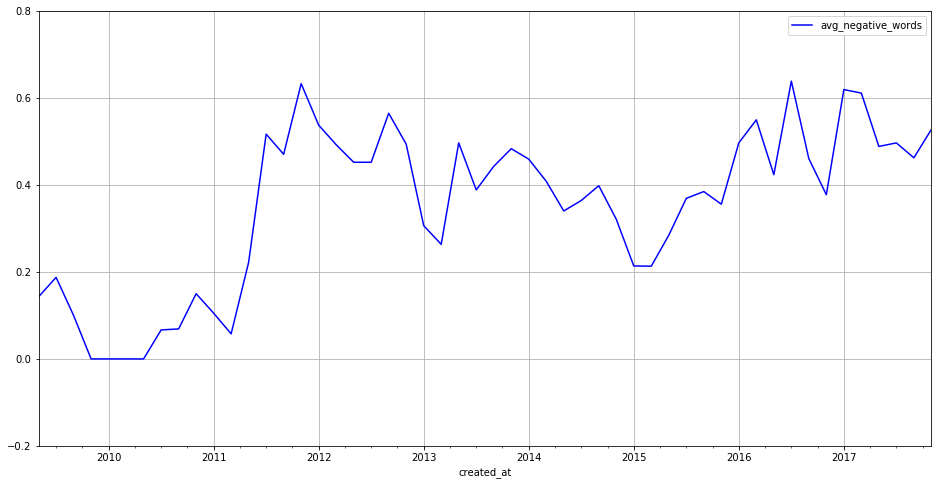

In [67]:
monthly_negative_words = condensed_dataset['negative_words'].groupby(pd.TimeGrouper(freq='2M')).mean()
monthly_negative_words.plot(grid=True, label='avg_negative_words', color='blue', ylim=(-0.2, 0.8), figsize =(16,8))
plt.legend(loc='upper right')

We can see that the number of bad words used was really low in the first two years, then followed by a sudden increase in 2011,  a continuous decrease until mid-2015 and then again a continuous increase starting with mid-2015 until 2017. Knowing that he announced his presidential candidacy in June 2015, we might correlate his increase in negative words with his fight for the presidency and then maybe for his tries to prove he is a "strong" leader. 

---

We feel like this point of view should be investigated more closely, with a wider dataset or maybe on some different sub-datasets, which will be presented in a next section.

### Performing tweets sentiment analysis

Next idea would be to consider a sentiment analysis classifier, to analyze the sentiment of each tweet and then look for major changes in the sentiment of the tweets as a time-series.

For sentiment analysis we decided to use a classifier in the nltk package, namely **VADER**. As presented [in this link](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html), VADER assigns a sentiment score for each word, realized using crowd-sourcing on *Amazon Mechanical Turk*. In a nutshell, VADER looks not only at scores for words, but also at capitalisation of letters and expressions such as **extremely** bad, which should increase the negativity of the score, in this case. Also, this is one of the main reasons we decided to keep text exactly as it was initially and not change letters to lower. More information could be found in the initial [paper](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf). 

A thing that should be mentioned is that this method does not use Machine Learning techniques for classification, therefore we might want to look more into further methods. Therefore, we first create an instance of the sentiment analyzer:

In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

Then, we would want to create a new column, where we could keep the sentiment for each tweet. For that, we can use the following method: 

In [57]:
condensed_dataset['sentiment'] = condensed_dataset.text.map(lambda x: sid.polarity_scores(x)['compound'])

Then, a plot of the average sentiment every two months is realized below:

In [ ]:
monthly_sentiment = condensed_dataset['sentiment'].groupby(pd.TimeGrouper(freq='2M')).mean()
monthly_sentiment.plot(grid=True, label='avg_sentiment', color='blue', ylim=(-0.2, 0.8), figsize =(16,8))
plt.legend(loc='upper right')

We can see that the current plot can be interpreted exactly as the one before, where we could see a decrease in positivity between 2011 and 2012, then an increase until 2015 and then again a decrease. Again, the signal is not very strong, but there might be imbalanced features present, and after balancing them we might actually get some good results.

---

Also, for a good result using ML techniques, we might use [*Google Sentiment Analysis Tool*](https://cloud.google.com/natural-language/docs/sentiment-tutorial), which will be tried for the next milestone, supposing that the Google product is one reference classifier for sentiment analysis. 

### Using words emotion valence

The third tried method is to move from sentiment analysis, which has only two outputs (positive or negative), to emotions, which have a bigger number of outputs. Therefore, we could use words emotions valence, i.e. scores assigned to a list of words, for how likely it is that each word has a specific emotion. For that, we could use the [**Depeche Mood**](https://github.com/marcoguerini/DepecheMood/releases) dataset, which has over 37K words associated with emotions scores, for each one of this emotions:
* AFRAID
* AMUSED
* ANGRY
* ANNOYED
* DONT_CARE
* HAPPY
* INSPIRED
* SAD

We import the dataset below and take a short look at some random 10 entries:

In [69]:
EMOTIONS_FILE = os.path.join('.', 'data', 'DepecheMood_V1.0', 'DepecheMood_tfidf.txt')

emotions_df = pd.read_csv(EMOTIONS_FILE, sep='\t')
emotions_df[2000:2010]

,Lemma#PoS,AFRAID,AMUSED,ANGRY,ANNOYED,DONT_CARE,HAPPY,INSPIRED,SAD
2000,asphalt#v,0.000000,0.455288,0.000000,0.233177,0.218037,0.000000,0.000000,0.093499
2001,asphyxia#n,0.000000,0.000000,0.214225,0.368184,0.000000,0.000000,0.000000,0.417591
2002,asphyxiate#v,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
2003,asphyxiation#n,0.039041,0.000000,0.238446,0.026706,0.034577,0.000000,0.000000,0.661231
2004,aspirant#n,0.073484,0.147461,0.171933,0.238579,0.148417,0.108419,0.054856,0.056852
2005,aspiration#n,0.149646,0.108822,0.070699,0.124269,0.145628,0.125095,0.179783,0.096058
2006,aspire#v,0.108132,0.133935,0.075823,0.131043,0.129200,0.114679,0.225105,0.082085
2007,aspirin#n,0.079129,0.237204,0.185007,0.050172,0.130326,0.134831,0.009180,0.174151
2008,aspiring#a,0.066070,0.083700,0.123111,0.167108,0.175827,0.111036,0.168852,0.104297
2009,ass#n,0.090754,0.253146,0.158853,0.123856,0.124280,0.066958,0.123809,0.058344


We can see that besides the word, we will need to have the associated Part of Speech, and also the word is represented by a root, and not a derived form (such as *aspirations* for *aspiration*), for example. Therefore, we might want to change the processing function of a tweet, written at first point, to also include the Part of Speech of each word, and also to extract the root of the word, process called *lemmatization*. This is all done below, in the exact same manner as for the previous task:

In [71]:
def remove_stop_words_pos(words_pos):
    '''Function that removes the stopwords from the given list. The list has the form [(word, pos)], as opposed to the first
    case, where it was only [word].'''
    
    extra_list = ["'s", "n't"]

    filter_function = lambda x: (x[0] not in extra_list) and (x[0] not in (stopwords.words('english'))) 
    # the filtering function, i.e. only takes into consideration words that are not in stopword corpus or hand-crafted list
    # note that only the words are taken into consideration, and words are on the first position of the pair.
    
    processed = list(filter(filter_function, words_pos))
    return processed

In [72]:
def delete_punctuations_pos(words):
    '''Function that removes the punctuation marks from the given list, which has the format [(word, pos)].'''
    
    punctuation_marks = [".", "?", "!", ":", ";", "-", "(", ")", "[", "]", "...", "\"", ",",'“', '"', "'", "”", '``', "''", '@', '#', "’", '&']
    return list(filter(lambda x: x[0] not in punctuation_marks, words))

For lemmatization and POS tagging, we will use also nltk corpuses, as defined below:

In [74]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

The wordnet lemmatizer has different POS tags than the nltk ones, so we need a function to convert between the two:

In [75]:
def get_wordnet_pos(treebank_tag):
    '''Function that transforms nltk tag to wordnet tag'''
    
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

Also, the Depeche Mood library uses different POS tags, and we need to transform between the nltk ones and Depeche Mood ones:

In [77]:
def get_depeche_mood_pos(treebank_pos):
    '''Function that transforms nltk tag to Depeche Mood tag.'''
    
    if treebank_pos.startswith('J'):
        return 'a' # adjective is a in Depeche Mood, compared to J in nltk.
    return treebank_pos[0].lower()

Next, we know that the words in Depeche Mood are in the form *lemmatized#POS*, so we write a function that constructs this format:

In [79]:
def lemmatize_and_join(word, pos):
    '''Function that lemmatizes a word, and then returns a word in the format lemmatized#POS, as required by the Depeche Mood 
    dataset. Note that the POS given as parameter is one in the nltk library, not Depeche Mood or WordNet.'''
    
    pos_wordnet = get_wordnet_pos(pos)
    
    if pos_wordnet == '':
        return None # not a part of speech
    
    lemmatized = lemmatizer.lemmatize(word, pos_wordnet)
    pos_depeche_mood = get_depeche_mood_pos(pos)
    
    return lemmatized + "#" + pos_depeche_mood

Now we are ready to write the new processing function, which will return the list of words, but in the special format used by the Depeche Mood dataset:

In [80]:
def process_tweet_pos(tweet):
    '''Function that processes a tweet as in previous case, but also appending the POS and lemmatizing the word'''
    
    tweet = tweet.lower() # convert everything to lower-case
    
    tweet = remove_unwanted(tweet) # remove links and other unwanted parts of tweet
    words = nltk.word_tokenize(tweet) # tokenize tweet into words
    words_pos = nltk.pos_tag(words) # realize the POS-tagging of the tweet
    
    no_stop_words = remove_stop_words_pos(words_pos) # remove the stopwords
    no_punctuation = delete_punctuations_pos(no_stop_words) # remove the punctuation marks
    
    words_unfiltered = [lemmatize_and_join(word, pos) for word, pos in no_punctuation] # construct the list of lemmatized words
    words_final = list(filter(lambda x: x is not None, words_unfiltered)) # remove the Nones from the final list
    
    return words_final

Next, having this function, we might want to compute an emotion score for each tweet. For that, we will compute an emotion score for each word in the tweet, and the score of the entire tweet will be represented by the sum of the scores of each word. We will write the function that realizes the tweet scores modularily, using helper-functions. First, we write a function that initializes the scores for each emotion to 0: 

In [81]:
def initialize_scores():
    '''Function that initializes the score for each emotion to 0.'''
    
    score_dict = {}
    
    for emotion in emotions_df.columns[1:]:
        score_dict[emotion] = 0
        
    return score_dict

Then, we need a function that, given a specific word that exists in the Depeche Mood dataset and the current scores for each emotion as a dictionary, updates the scores for each emotion by realizing the sum with the new scores:

In [82]:
def update_scores(word_pos, score_dict):
    '''Function that updates the emotion scores with the values associated with the given word.'''
    
    word_emotions_scores = dict(emotions_df[emotions_df['Lemma#PoS'] == word_pos].iloc[0])
    del word_emotions_scores['Lemma#PoS']
    
    for emotion, score in word_emotions_scores.items():
        score_dict[emotion] += score

Finally, we might write the function that computes the emotion scores for the tweet:

In [83]:
def get_tweet_scores(tweet):
    '''Function that computes the tweet emotion scores for the given tweet.'''
    
    score_dict = initialize_scores() # initialize the scores to 0
    emotions_words = set(emotions_df['Lemma#PoS']) 
    
    words_filtered_pos = process_tweet_pos(tweet) # process the tweet as written above
    
    for word_pos in words_filtered_pos:
        if word_pos not in emotions_words: # pass over the words which are not in Depeche Mood dataset
            continue
            
        update_scores(word_pos, score_dict) # update the scores for each emotion according to the scores of the current word
    
    return score_dict

Having the function that computes the emotion scores for each tweet as the sum of the emotion scores for each individual word, we can now include all those scores as new columns in the dataset. Therefore, we do it below:

In [85]:
condensed_final = condensed_dataset.copy()
emotions = set(emotions_df.columns) - {'Lemma#PoS'} # all the emotions in the dataset

emotions_dict = {emotion : [] for emotion in emotions} # for each emotion, construct the list of tweet scores, in order
    
for tweet in condensed_final.text:
    scores = get_tweet_scores(tweet) # compute the emotion scores, for each emotion
    
    for emotion, score in scores.items():
        emotions_dict[emotion].append(score)
        
for emotion_name, emotion_values in emotions_dict.items():
    new_column = pd.Series(emotion_values, index=condensed_final.index) # create the new column with the index of dataframe
    condensed_final[emotion_name] = new_column # add new column to dataframe

In [86]:
condensed_final.head()

,favorite_count,retweet_count,source,text,negative_words,sentiment,AFRAID,AMUSED,ANGRY,ANNOYED,SAD,HAPPY,DONT_CARE,INSPIRED
created_at,,,,,,,,,,,,,,
2009-05-04 18:54:25,202,253,Twitter Web Client,Be sure to tune in and watch Donald Trump on L...,0,0.5255,0.992164,1.702892,1.311094,1.409545,1.153361,1.352038,1.637963,1.440944
2009-05-05 01:00:10,3,2,Twitter Web Client,Donald Trump will be appearing on The View tom...,0,0.7712,1.057917,1.848110,1.103627,1.528575,1.340874,1.446139,2.017966,1.656793
2009-05-08 13:38:08,2,3,Twitter Web Client,Donald Trump reads Top Ten Financial Tips on L...,1,0.6468,1.006678,1.632097,1.134400,1.216011,1.004224,1.196502,1.551681,1.258408
2009-05-08 20:40:15,27,8,Twitter Web Client,New Blog Post: Celebrity Apprentice Finale and...,0,0.0000,0.740472,1.407248,0.710885,1.067461,0.992012,1.279288,1.308805,1.493830
2009-05-12 14:07:28,1950,1421,Twitter Web Client,"""My persona will never be that of a wallflower...",0,0.0000,0.631105,1.087715,0.680554,0.965473,0.785413,0.839137,0.941357,1.069245


Next, we want to plot the results of the above computations, aggregated per two months:

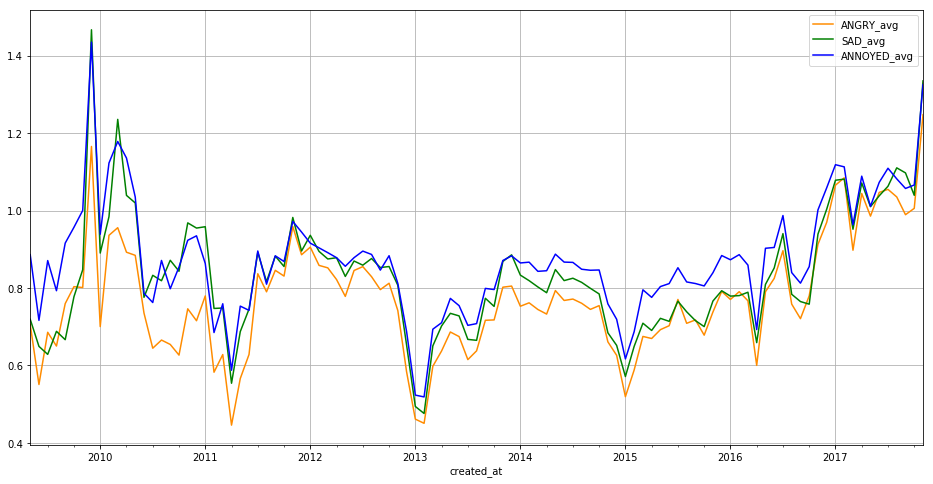

In [95]:
emotions = ['ANGRY', 'SAD', 'ANNOYED']
colors = ['darkorange', 'green', 'blue']

for emotion, color in zip(emotions, colors):
    aggregate = condensed_final[emotion].groupby(pd.TimeGrouper(freq='1M')).mean()
    aggregate.plot(grid=True, label=emotion + '_avg', color=color, figsize =(16,8))
    
plt.legend(loc='upper right')

### Future Work

For detecting the possible change in sentiment in Trump's tweets, we can use more specialized methods for sentiment analysis. Also, we want to provide confidence levels for the found differences, in order to be able to say that the results are sound. 

# Easy plotting that is cool and can be integrated in HTML

In [1]:
import plotly

In [19]:
IFrame("temp-plot.html", "100%", "500px")

In [13]:

print(plotly.__version__)  # version >1.9.4 required
from plotly.graph_objs import Scatter, Layout
plotly.offline.plot({
"data": [
    Scatter(x=[1, 2, 3, 4], y=[4, 1, 3, 7])
],
"layout": Layout(
    title="hello world"
)
})

2.2.3


'file://E:\\SWITZERLAND - 2017\\Msc\\CS-401\\ADA-CS-401\\Project\\temp-plot.html'